In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error
# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

In [3]:
data_file = 'train.csv'

# import cafe listings into dataframe
house_raw = pd.read_csv(data_file)

house = house_raw

# initial view of the dataset
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
house.shape

(1460, 81)

In [6]:
house.duplicated().sum()

0

In [470]:
house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [233]:
house.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      57.623288     34.664304      0.0      42.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.117123    180.731373      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1460.0    1868.739726    453.697295      0.0    1958.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   
renovated      1460.0      13.597945     24.476465      0.0       0.00   
age            1460.0      22.950000     20.640653     -1.0       4.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        63.0      79.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     164.25    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       

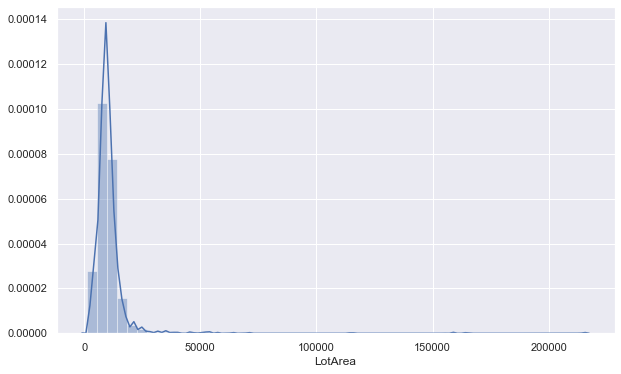

In [124]:
sns.distplot(house.LotArea)

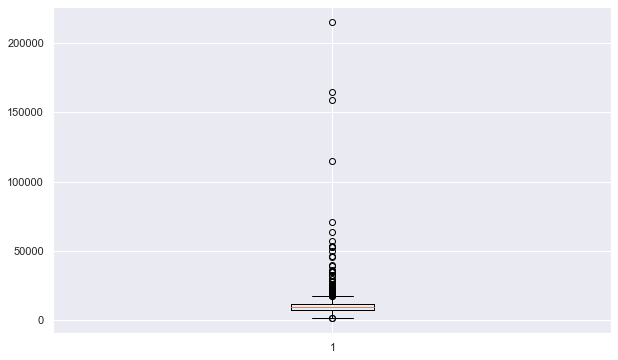

In [125]:
plt.boxplot(house.LotArea)
plt.show()

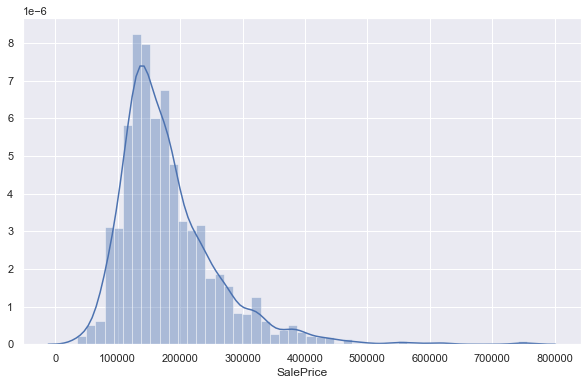

In [126]:
sns.distplot(house.SalePrice)

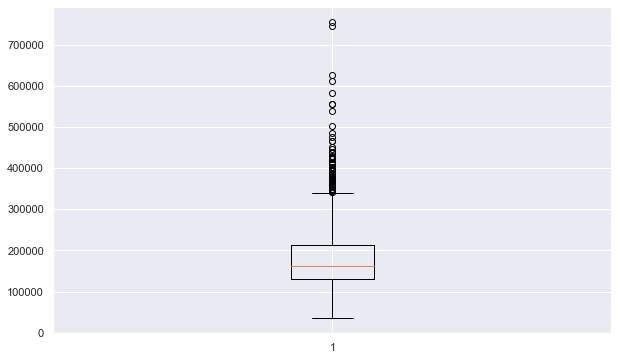

In [127]:
plt.boxplot(house.SalePrice)
plt.show()

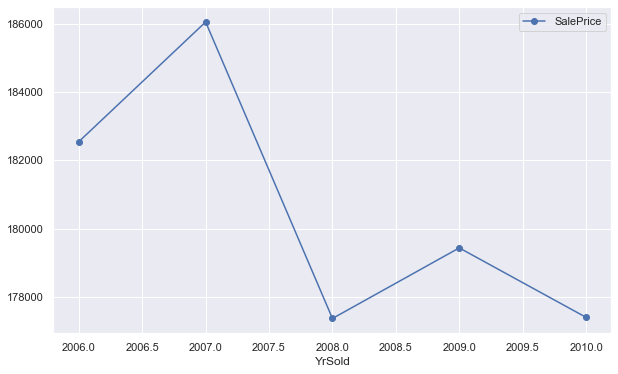

In [22]:
# sns.lineplot(data=house,x='MoSold',y='SalePrice')

# plt.plot(house.YrSold,house.SalePrice,marker='o')

# sns.swarmplot(data=house,x='MoSold',y='SalePrice')

# plt.hist(house.MoSold)

house.groupby('YrSold').agg({'SalePrice':'mean'}).plot(marker='o')

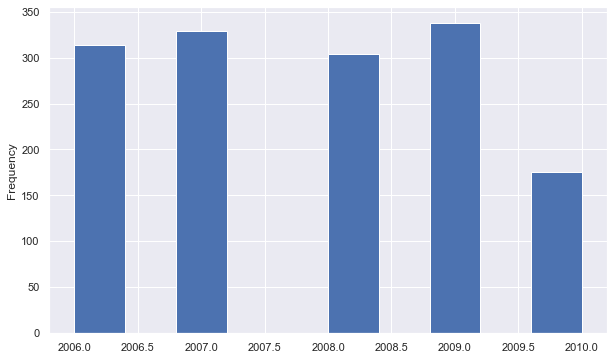

In [79]:
house['YrSold'].plot.hist()

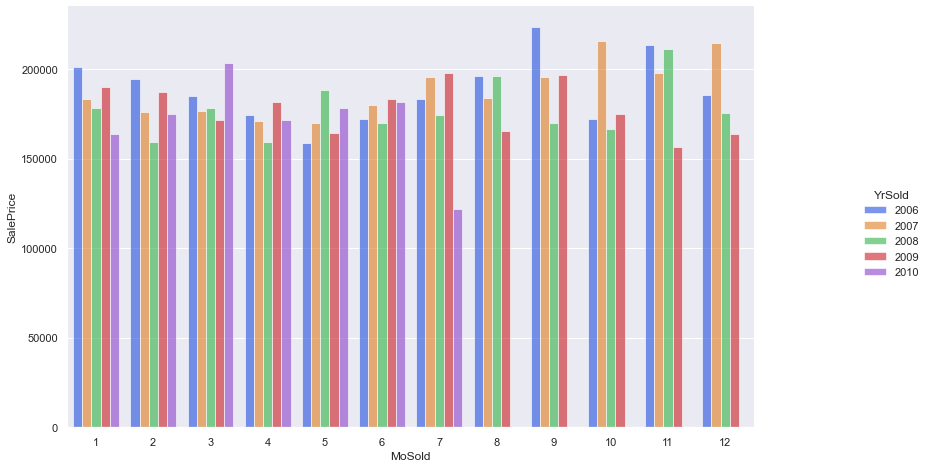

In [78]:

sns.catplot(
    data=house, kind="bar",
    x="MoSold", y="SalePrice", hue="YrSold", ci=None,
    palette="bright", alpha=.6
)

plt.gcf().set_size_inches(15, 7)


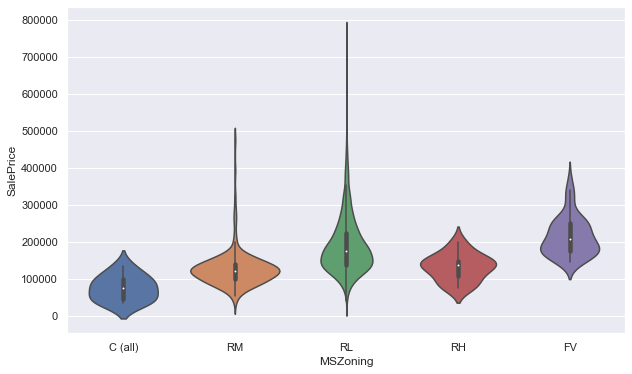

In [74]:
f, ax = plt.subplots()
sns.violinplot(x='MSZoning',y='SalePrice',data=house.sort_values('SalePrice'))


In [476]:
house.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [477]:
house.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

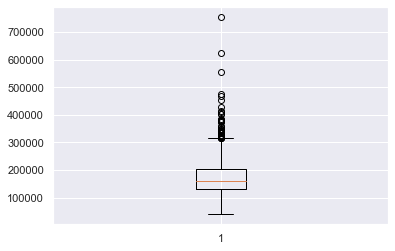

In [99]:
plt.boxplot(house.SalePrice)
plt.show()

In [141]:
# get all numerical columns

num_dtypes = ['int16','int32', 'int64','float16','float32','float64']
num_cols = []
for i in house.columns:
    if house[i].dtype in num_dtypes:
        num_cols.append(i)
# num_cols

In [142]:
# get all ordinal columns

ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
len(ordinal_cols)

14

In [143]:
# get all nominal columns

nominal_cols = list(set(house.columns) - set(num_cols) - set(ordinal_cols))
print(nominal_cols)

['Condition1', 'GarageType', 'LandContour', 'LotConfig', 'Alley', 'Heating', 'LotShape', 'Exterior1st', 'GarageFinish', 'MasVnrType', 'Street', 'Exterior2nd', 'LandSlope', 'Neighborhood', 'Foundation', 'Condition2', 'RoofMatl', 'PavedDrive', 'HouseStyle', 'SaleCondition', 'Functional', 'SaleType', 'CentralAir', 'MiscFeature', 'RoofStyle', 'MSZoning', 'Electrical', 'BldgType', 'Utilities']


In [146]:
# CHECK MISSING VALUES

# replace 0 to nan value of numercial cols

missingValues_cols = {}
for i in house.columns:
    if (house[i].dtype in num_dtypes):
        house[i].fillna(0,inplace=True)
    elif (house[i].isnull().sum() > 0):
        missingValues_cols.update({i: house[i].isnull().sum()})
        
# print(missingValues_cols)

missingVal_df = pd.DataFrame(missingValues_cols.items(),columns=['column_name','total_missing_val'])
# missingVal_df

# replace 'None' to nan value of categorical cols
for i in missingVal_df['column_name']:
    house[i] = house[i].fillna('NA')

house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [81]:
house['renovated'] = house['YearRemodAdd'] - house['YearBuilt'] 
house['age'] = house['YrSold'] - house['YearRemodAdd'] 

house.age.describe()

count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: age, dtype: float64

In [15]:
house.renovated.describe()

count    1460.000000
mean       13.597945
std        24.476465
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max       123.000000
Name: renovated, dtype: float64

In [22]:
house[house.renovated==123].YearBuilt
house[house.renovated==123].YearRemodAdd
house[house.age==0]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
11      12          60       RL         85.0    11924   Pave    NA      IR1   
13      14          20       RL         91.0    10652   Pave    NA      IR1   
20      21          60       RL        101.0    14215   Pave    NA      IR1   
58      59          60       RL         66.0    13682   Pave    NA      IR2   
87      88         160       FV         40.0     3951   Pave  Pave      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1403  1404          20       RL         49.0    15256   Pave    NA      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1437  1438          20       RL         96.0    12444   Pave    NA      Reg   
1451  1452          20       RL         78.0     9262   Pave    NA      Reg   
1453  1454          20       RL         90.0    17217   Pave    NA      Reg   

     LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold  \
11           Lvl    AllPub  ...    NA          NA       0      7   2006   
13           Lvl    AllPub  ...    NA          NA       0      8   2007   
20           Lvl    AllPub  ...    NA          NA       0     11   2006   
58           HLS    AllPub  ...    NA          NA       0     10   2006   
87           Lvl    AllPub  ...    NA          NA       0      6   2009   
...          ...       ...  ...   ...         ...     ...    ...    ...   
1403         Lvl    AllPub  ...    NA          NA       0      8   2007   
1432         Lvl    AllPub  ...    NA          NA       0      8   2007   
1437         Lvl    AllPub  ...    NA          NA       0     11   2008   
1451         Lvl    AllPub  ...    NA          NA       0      5   2009   
1453         Lvl    AllPub  ...    NA          NA       0      7   2006   

     SaleType SaleCondition  SalePrice  renovated  age  
11        New       Partial     345000          1    0  
13        New       Partial     279500          1    0  
20        New       Partial     325300          1    0  
58        New       Partial     438780          0    0  
87        New       Partial     164500          0    0  
...       ...           ...        ...        ...  ...  
1403       WD        Normal     282922          0    0  
1432       WD        Normal      64500         80    0  
1437      New       Partial     394617          0    0  
1451      New       Partial     287090          1    0  
1453       WD       Abnorml      84500          0    0  

[124 rows x 83 columns]

SaleType
COD      AxesSubplot(0.286,0.125;0.453x0.755)
CWD      AxesSubplot(0.286,0.125;0.453x0.755)
Con      AxesSubplot(0.286,0.125;0.453x0.755)
ConLD    AxesSubplot(0.286,0.125;0.453x0.755)
ConLI    AxesSubplot(0.286,0.125;0.453x0.755)
ConLw    AxesSubplot(0.286,0.125;0.453x0.755)
New      AxesSubplot(0.286,0.125;0.453x0.755)
Oth      AxesSubplot(0.286,0.125;0.453x0.755)
WD       AxesSubplot(0.286,0.125;0.453x0.755)
Name: SalePrice, dtype: object

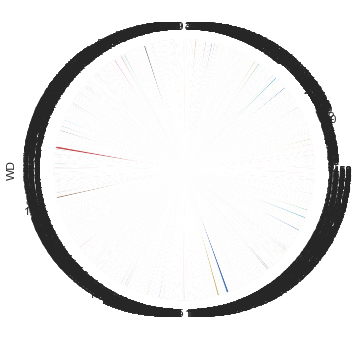

In [27]:
house.groupby('SaleType')['SalePrice'].plot.pie()

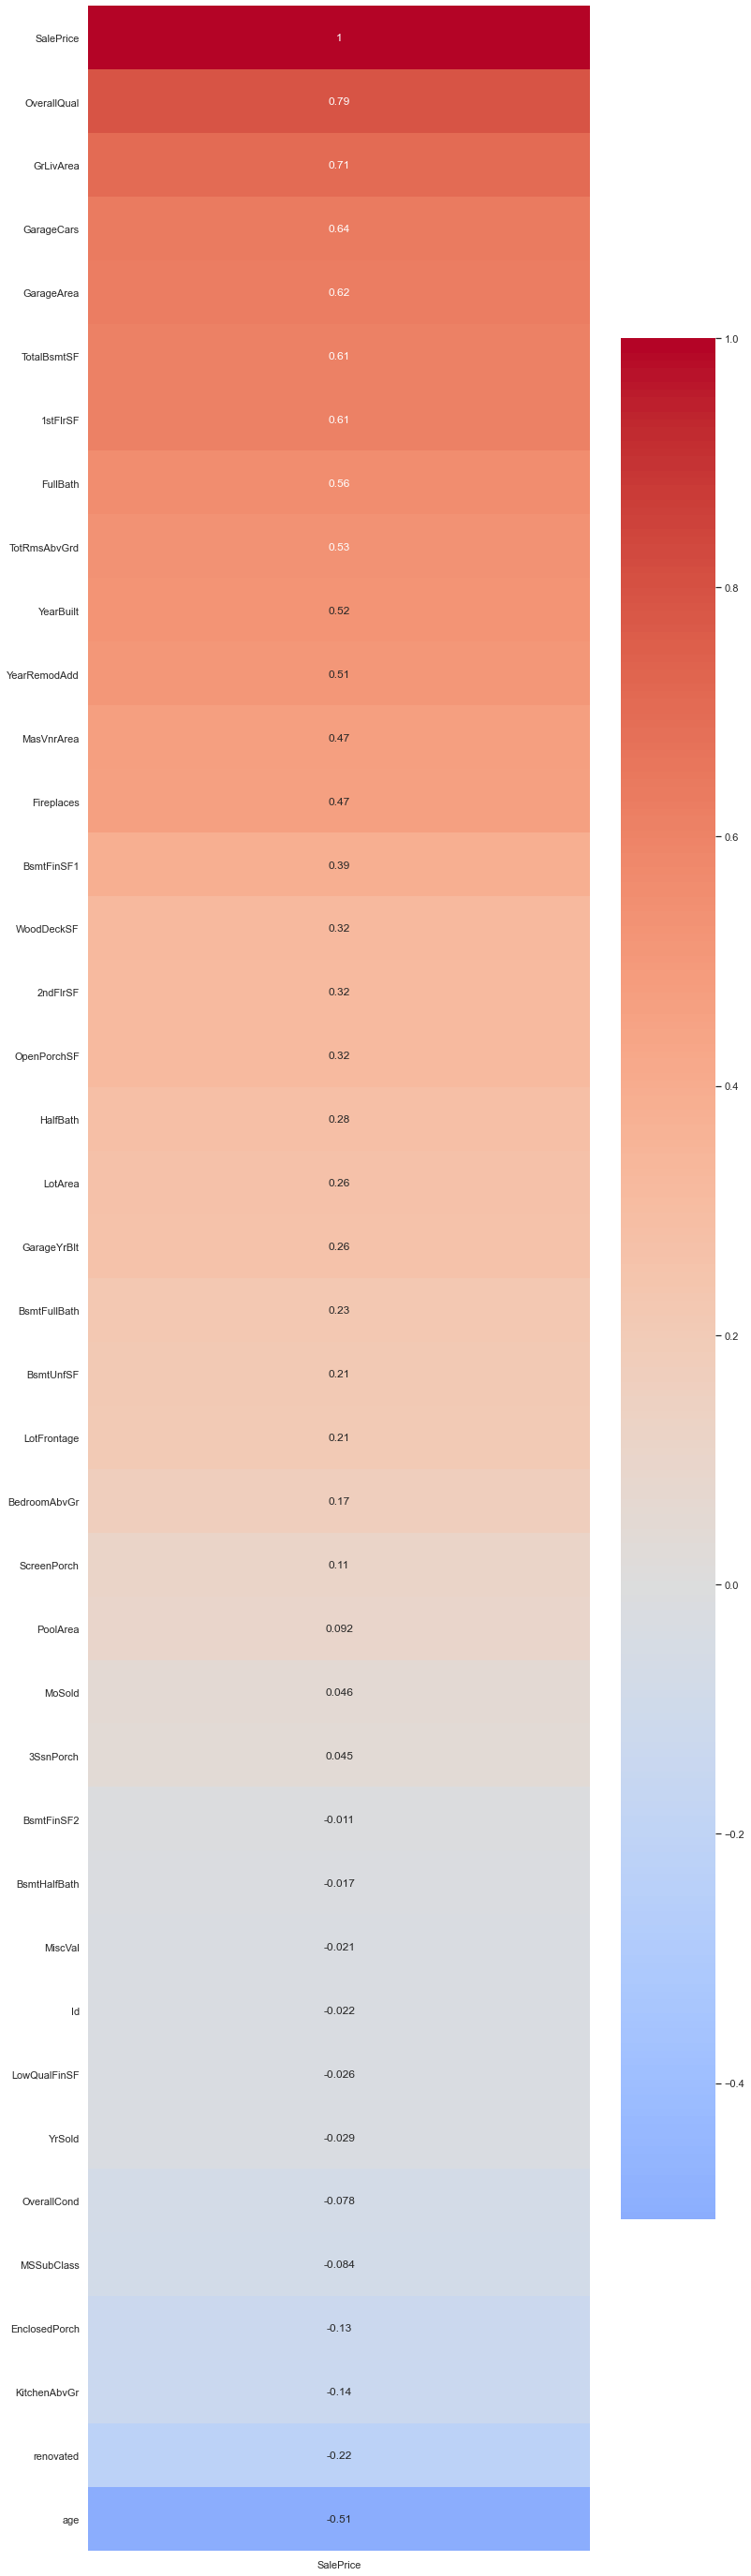

In [23]:
figure = plt.figure(figsize=(12,50))
sns.heatmap(house.corr()[['SalePrice']].sort_values('SalePrice',ascending=False),annot=True, cmap='coolwarm', center=0);


Total numeric cols:  40


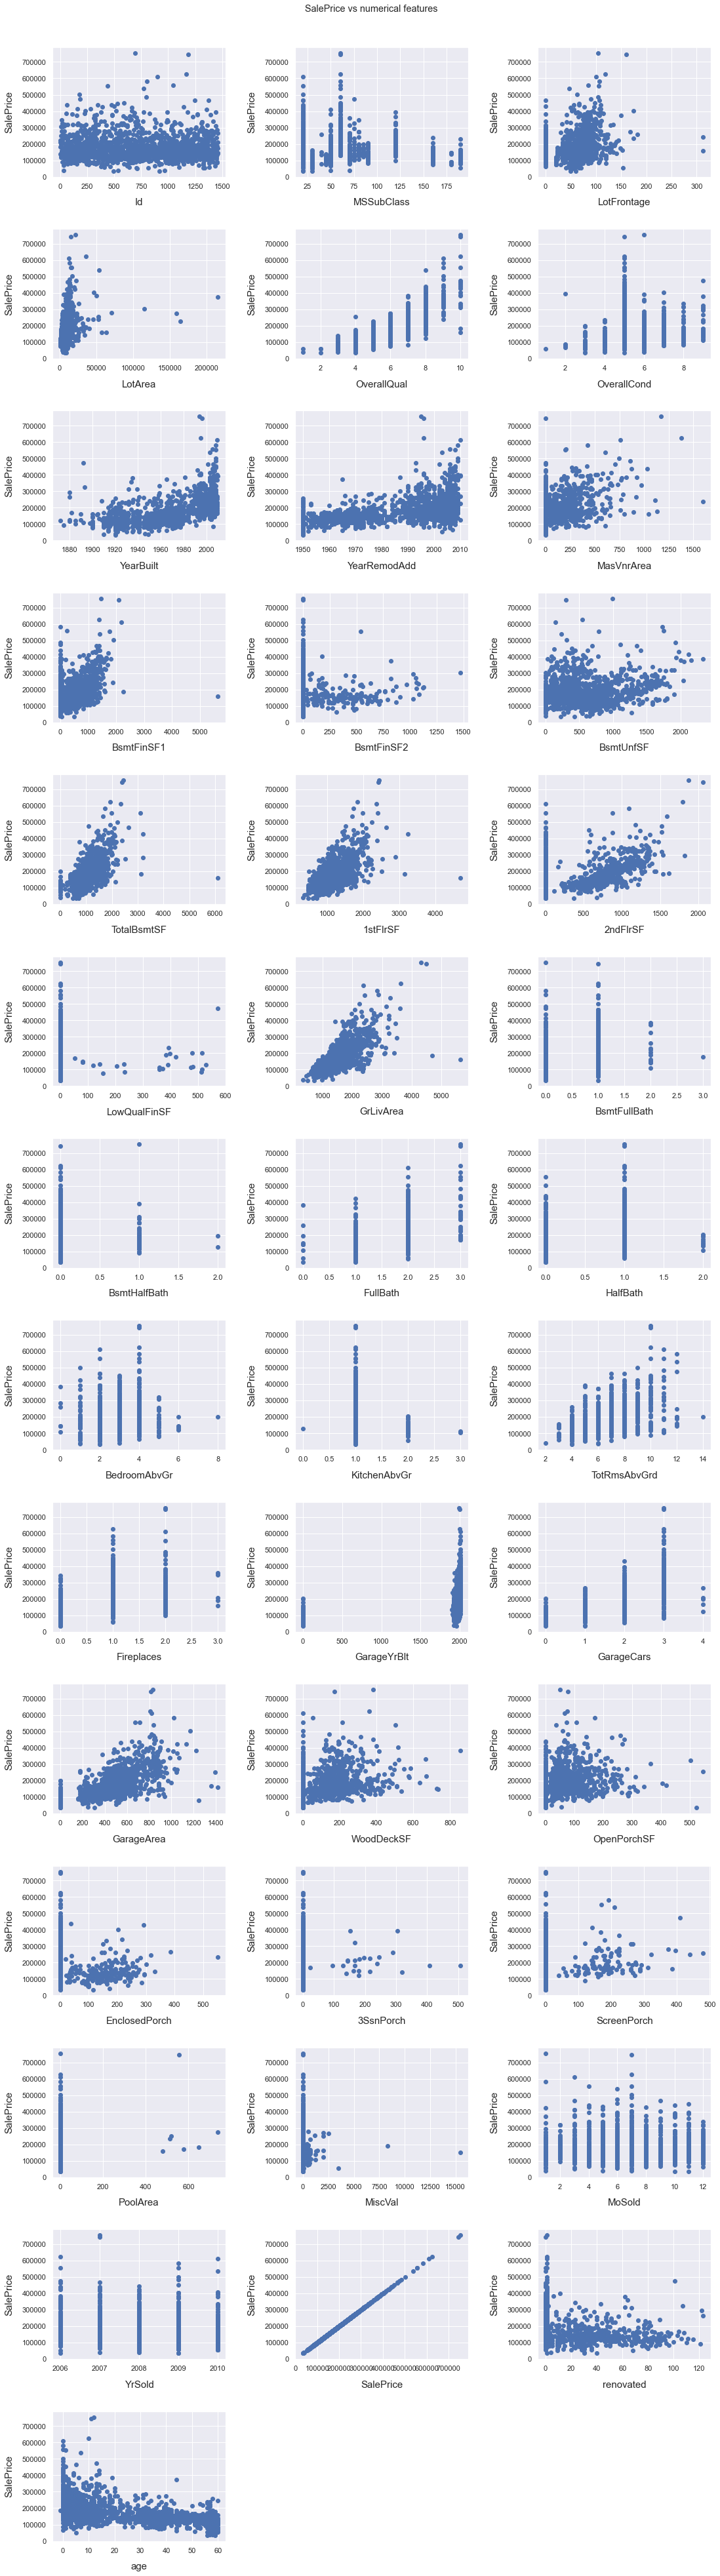

In [11]:
# plot sale price of all numerical columns
        
print('Total numeric cols: ',len(num_cols))

fig = plt.figure(figsize=(18, 180))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.975)
fig.suptitle('SalePrice vs numerical features')

for i, col in enumerate(list(house[num_cols]),1):
    # print(i)
    ax = fig.add_subplot(len(num_cols), 3, i)

    plt.scatter(x=house[col], y=house['SalePrice'])
    
    plt.xlabel('{}'.format(col), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
plt.show()

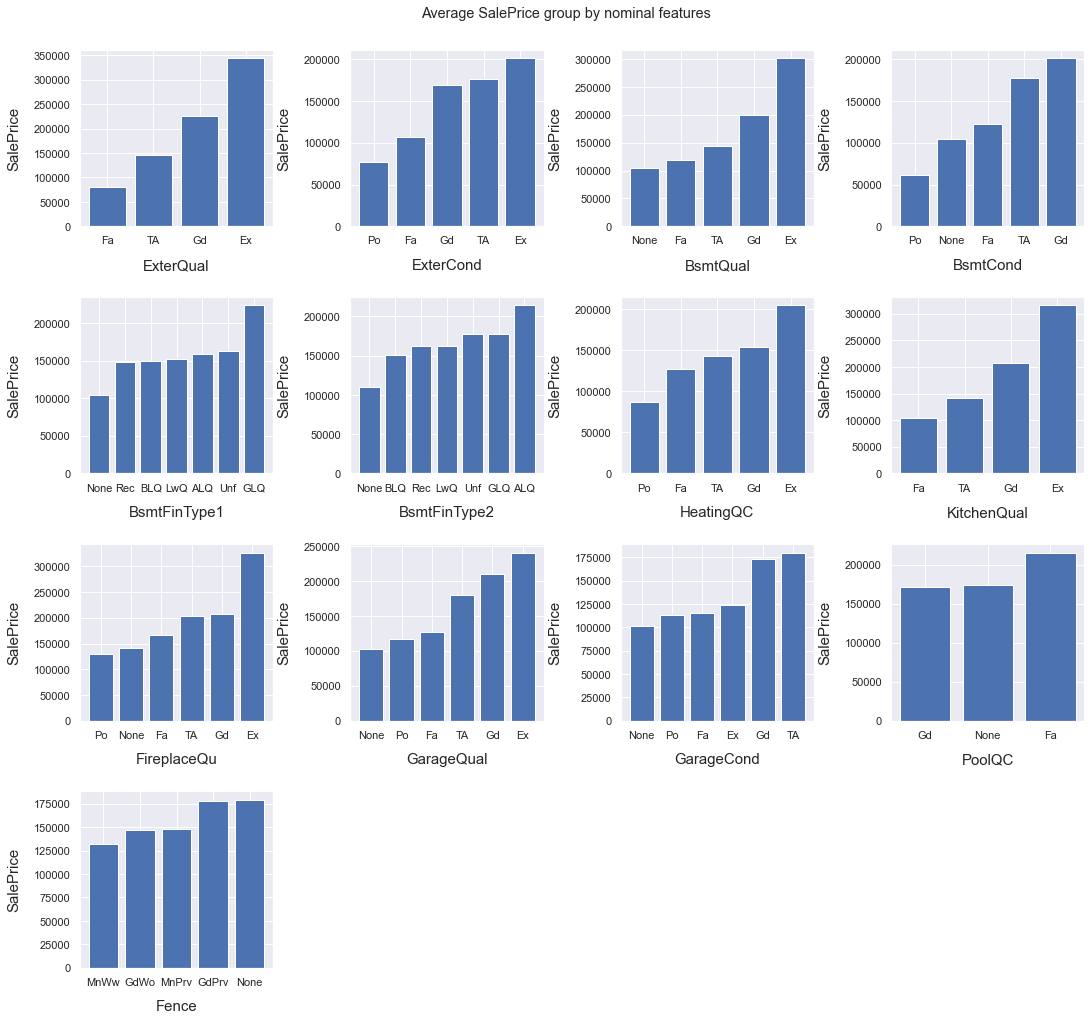

In [72]:
# plot average sale price of all ordinal columns

fig = plt.figure(figsize=(18, 120))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.975)
fig.suptitle('Average SalePrice group by nominal features')

for i, col in enumerate(list(house[ordinal_cols]),1):
    
    housegroup = house.groupby(col).agg({'SalePrice': 'mean'}).sort_values('SalePrice')
    # print(housegroup.head(5))
    
    ax = fig.add_subplot(len(nominal_cols), 4, i)
    ax.bar(housegroup.index,housegroup['SalePrice'])
    
    plt.xlabel('{}'.format(col), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
plt.show()


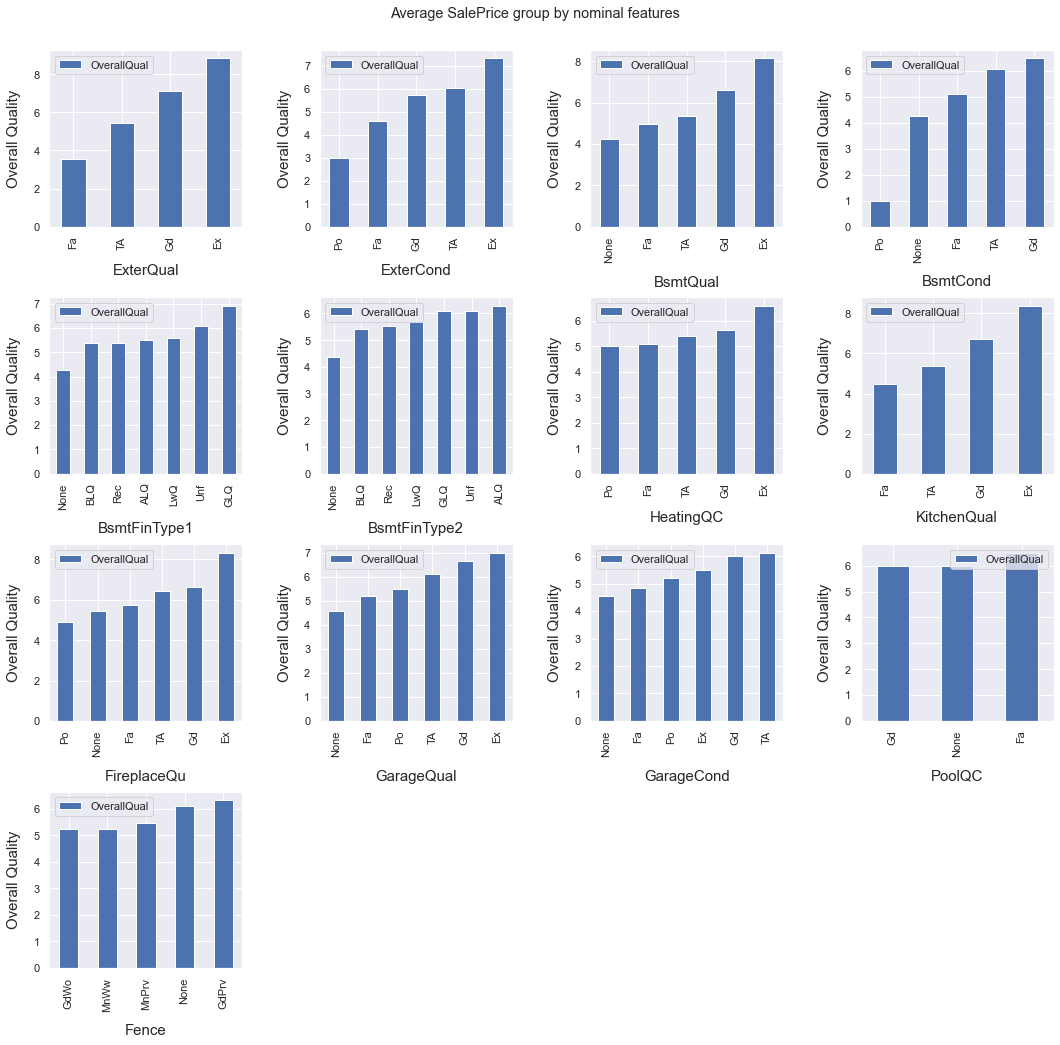

In [47]:
# plot average OveralQual of all ordinal columns

fig = plt.figure(figsize=(18, 120))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.975)
fig.suptitle('Average SalePrice group by nominal features')

for i, col in enumerate(list(house[ordinal_cols]),1):
    
    ax = fig.add_subplot(len(nominal_cols), 4, i)
    house.groupby(col).agg({'OverallQual':'mean'}).sort_values(by='OverallQual').plot.bar(ax=ax)
    
    plt.xlabel('{}'.format(col), size=15,labelpad=12.5)
    plt.ylabel('Overall Quality', size=15, labelpad=12.5)
    
plt.show()


Total nominals cols:  29


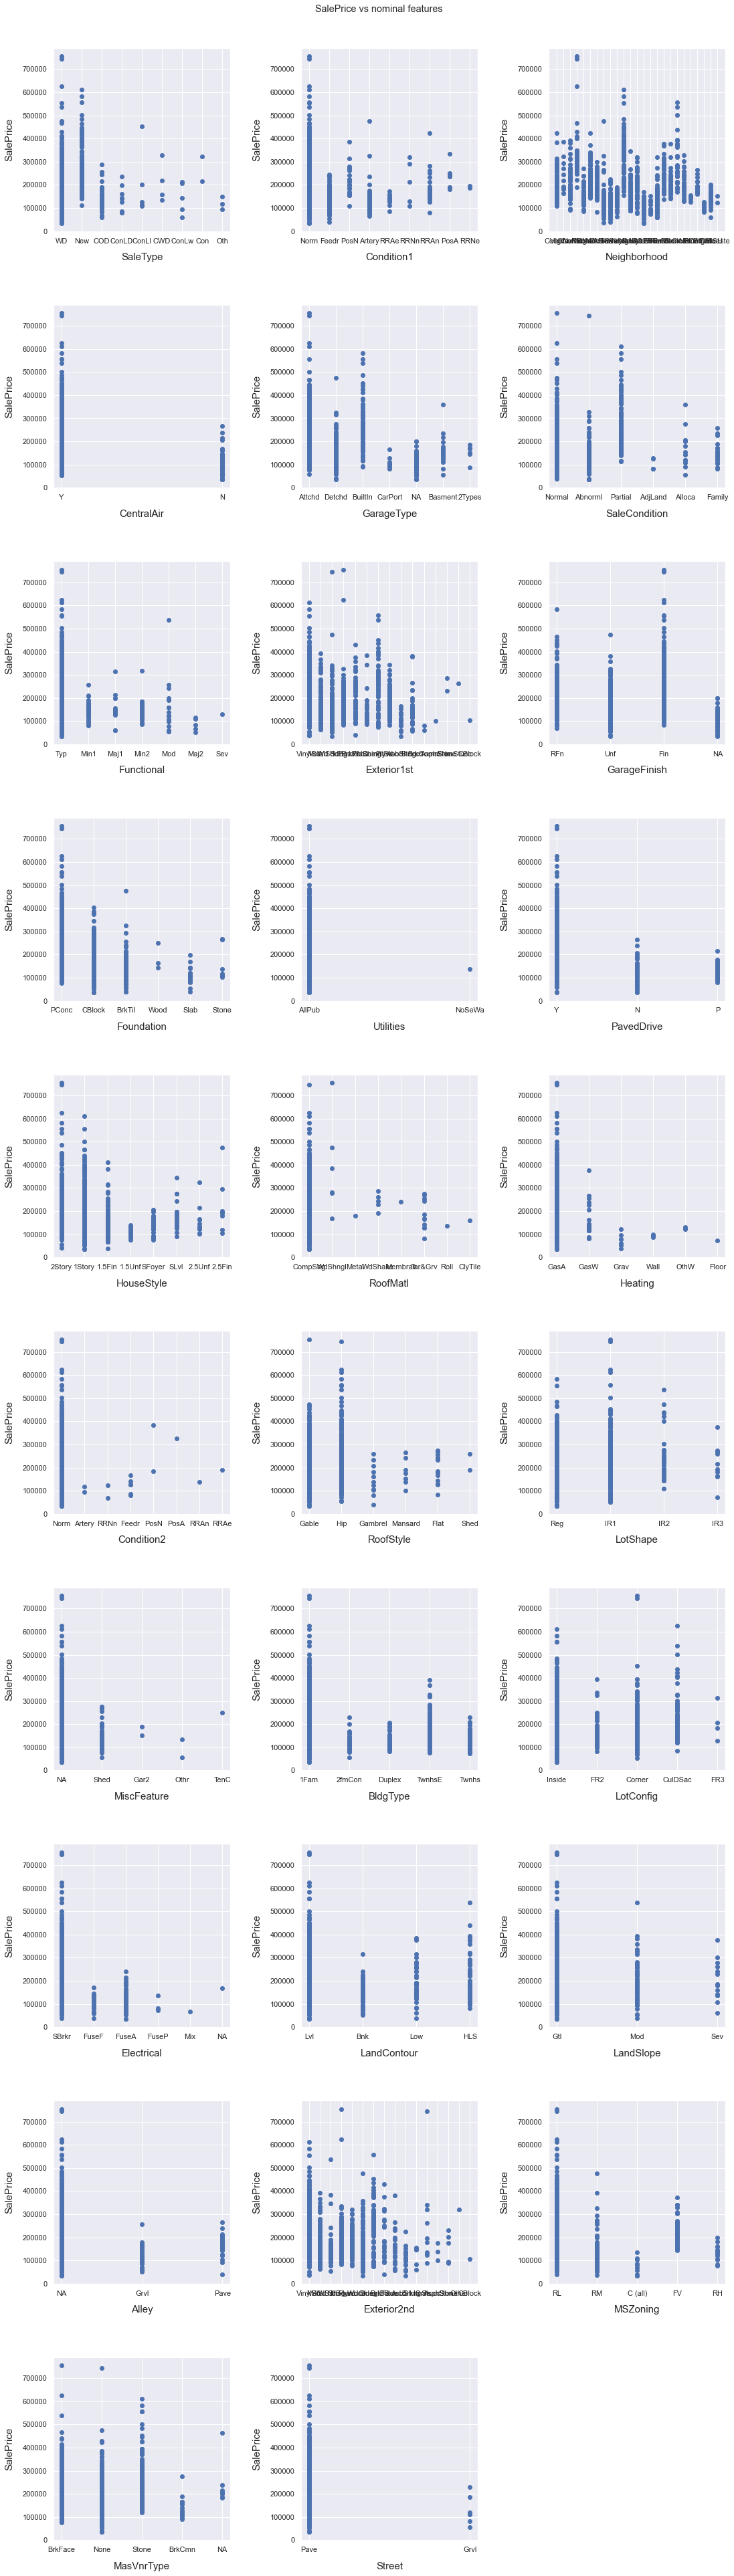

In [28]:
# plot sale price of all nominal columns
        
print('Total nominals cols: ',len(nominal_cols))

fig = plt.figure(figsize=(18, 180))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.975)
fig.suptitle('SalePrice vs nominal features')

for i, col in enumerate(list(house[nominal_cols]),1):
    # print(col)
    ax = fig.add_subplot(len(nominal_cols), 3, i)
    plt.scatter(x=house[col], y=house['SalePrice'])
    plt.xlabel('{}'.format(col), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
plt.show()

Total nominals cols:  30


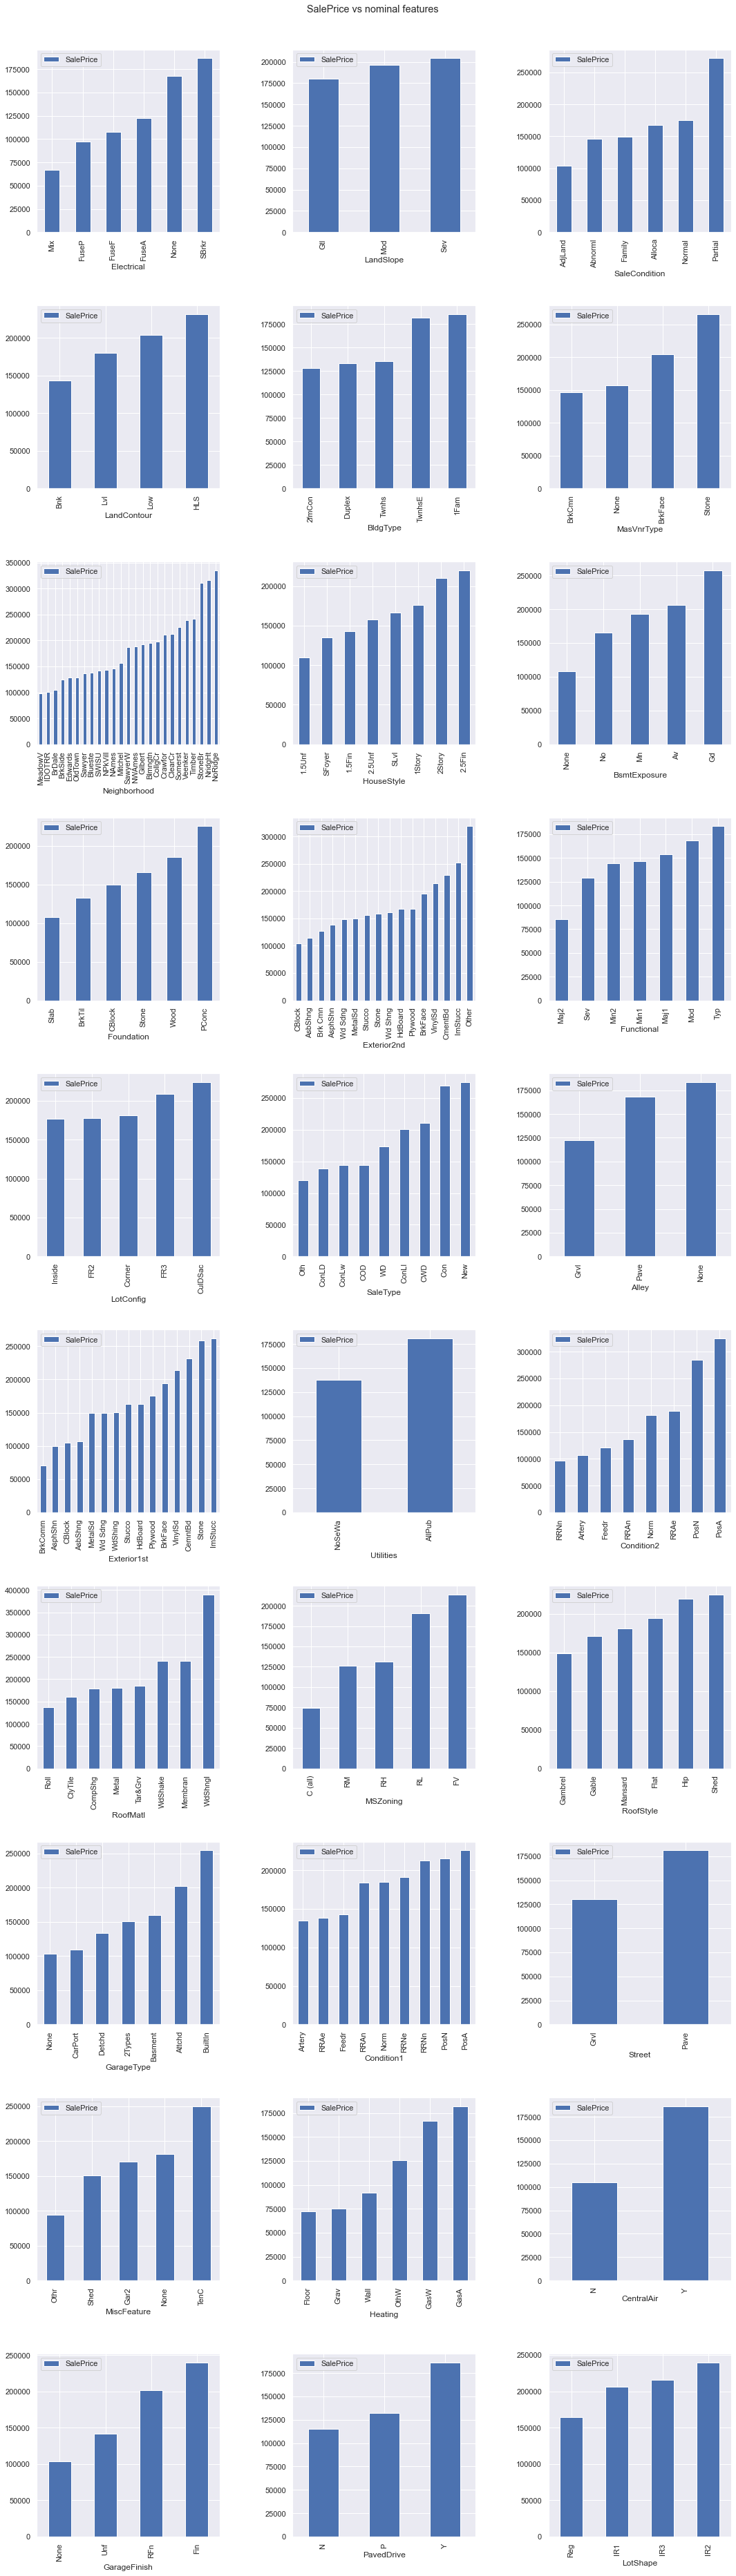

In [45]:
# AVERAGE sale price vs all nominal columns

print('Total nominals cols: ',len(nominal_cols))

fig = plt.figure(figsize=(18, 180))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.975)
fig.suptitle('SalePrice vs nominal features')

for i, col in enumerate(list(house[nominal_cols]),1):
    # print(col)
    ax = fig.add_subplot(len(nominal_cols), 3, i)
    house.groupby(col).agg({'SalePrice':'mean'}).sort_values(by='SalePrice').plot.bar(ax=ax)
plt.show()

In [40]:
house.groupby('CentralAir').count()
house[house.CentralAir == 'N']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
29      30          30       RM         60.0     6324   Pave    NA      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
39      40          90       RL         65.0     6040   Pave    NA      Reg   
52      53          90       RM        110.0     8472   Grvl    NA      IR2   
61      62          75       RM         60.0     7200   Pave    NA      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1387  1388          50       RM         60.0     8520   Pave  Grvl      Reg   
1393  1394         190       RM         60.0    10800   Pave  Pave      Reg   
1412  1413          90       RL         60.0     7200   Pave    NA      Reg   
1443  1444          30       RL          0.0     8854   Pave    NA      Reg   
1448  1449          50       RL         70.0    11767   Pave    NA      Reg   

     LandContour Utilities  ...  Fence MiscFeature MiscVal MoSold YrSold  \
29           Lvl    AllPub  ...     NA          NA       0      5   2008   
30           Lvl    AllPub  ...  MnPrv          NA       0      7   2008   
39           Lvl    AllPub  ...     NA          NA       0      6   2008   
52           Bnk    AllPub  ...     NA          NA       0      5   2010   
61           Lvl    AllPub  ...     NA          NA       0      3   2007   
...          ...       ...  ...    ...         ...     ...    ...    ...   
1387         Lvl    AllPub  ...   GdWo          NA       0      8   2007   
1393         Lvl    AllPub  ...     NA          NA       0      4   2008   
1412         Lvl    AllPub  ...     NA          NA       0      6   2009   
1443         Lvl    AllPub  ...     NA          NA       0      5   2009   
1448         Lvl    AllPub  ...   GdWo          NA       0      5   2007   

     SaleType SaleCondition  SalePrice  renovated  age  
29         WD        Normal      68500         23   58  
30         WD        Normal      40000         30   58  
39         WD       AdjLand      82000          0   53  
52         WD        Normal     110000          0   47  
61         WD        Normal     101000         76   11  
...       ...           ...        ...        ...  ...  
1387      CWD        Family     136000         34   57  
1393       WD        Normal     163000         95    8  
1412       WD        Normal      90000          1   59  
1443       WD        Normal     121000         34   59  
1448       WD        Normal     112000         90    7  

[95 rows x 83 columns]

In [259]:
# REMOVE OUTLIERS WITH SALE CONDITION "NORMAL" AND LOTAREA < 50,000
house = house[house.SaleCondition == 'Normal']
house = house[house.LotArea < 50000]


In [82]:
new_house = house[house.YearBuilt >= 1990]
never_remod = house[(house.renovated == 0) & (house.SaleType != 'New')]
yes_remod = house[(house.renovated != 0)]

print(len(never_remod))
print(len(yes_remod))

never_remod.describe().T

695
696


count           mean           std      min       25%  \
Id             695.0     734.125180    422.363929      1.0     364.0   
MSSubClass     695.0      60.597122     46.233918     20.0      20.0   
LotFrontage    537.0      69.646182     23.040230     21.0      60.0   
LotArea        695.0   10402.611511  11153.577911   1300.0    7800.0   
OverallQual    695.0       6.067626      1.231094      3.0       5.0   
OverallCond    695.0       5.271942      0.751179      3.0       5.0   
YearBuilt      695.0    1980.864748     18.166270   1950.0    1965.5   
YearRemodAdd   695.0    1980.864748     18.166270   1950.0    1965.5   
MasVnrArea     691.0     115.416787    172.010532      0.0       0.0   
BsmtFinSF1     695.0     486.941007    409.002280      0.0      16.0   
BsmtFinSF2     695.0      53.530935    161.199748      0.0       0.0   
BsmtUnfSF      695.0     520.041727    447.444189      0.0     174.5   
TotalBsmtSF    695.0    1060.513669    398.161958      0.0     848.0   
1stFlrSF       695.0    1147.533813    347.427638    483.0     894.0   
2ndFlrSF       695.0     297.454676    422.310818      0.0       0.0   
LowQualFinSF   695.0       0.345324      5.248456      0.0       0.0   
GrLivArea      695.0    1445.333813    454.409628    630.0    1087.0   
BsmtFullBath   695.0       0.461871      0.524253      0.0       0.0   
BsmtHalfBath   695.0       0.051799      0.228184      0.0       0.0   
FullBath       695.0       1.569784      0.520980      0.0       1.0   
HalfBath       695.0       0.421583      0.519749      0.0       0.0   
BedroomAbvGr   695.0       2.874820      0.789073      0.0       2.5   
KitchenAbvGr   695.0       1.050360      0.225332      0.0       1.0   
TotRmsAbvGrd   695.0       6.326619      1.514986      3.0       5.0   
Fireplaces     695.0       0.568345      0.624319      0.0       0.0   
GarageYrBlt    671.0    1982.435171     17.832761   1949.0    1967.0   
GarageCars     695.0       1.814388      0.643137      0.0       2.0   
GarageArea     695.0     482.674820    173.841917      0.0     398.0   
WoodDeckSF     695.0      98.028777    128.041957      0.0       0.0   
OpenPorchSF    695.0      42.991367     58.234792      0.0       0.0   
EnclosedPorch  695.0      12.833094     48.586514      0.0       0.0   
3SsnPorch      695.0       2.854676     29.794743      0.0       0.0   
ScreenPorch    695.0      14.395683     56.295896      0.0       0.0   
PoolArea       695.0       3.435971     45.639877      0.0       0.0   
MiscVal        695.0      32.926619    340.996428      0.0       0.0   
MoSold         695.0       6.165468      2.705521      1.0       4.0   
YrSold         695.0    2007.848921      1.349104   2006.0    2007.0   
SalePrice      695.0  174334.417266  63368.563648  55993.0  133000.0   
renovated      695.0       0.000000      0.000000      0.0       0.0   
age            695.0      26.984173     18.178542      0.0       8.0   

                    50%       75%       max  
Id                754.0    1089.5    1460.0  
MSSubClass         60.0      85.0     190.0  
LotFrontage        70.0      80.0     182.0  
LotArea          9473.0   11427.0  215245.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       8.0  
YearBuilt        1977.0    2000.0    2009.0  
YearRemodAdd     1977.0    2000.0    2009.0  
MasVnrArea          0.0     183.0    1129.0  
BsmtFinSF1        500.0     765.0    2096.0  
BsmtFinSF2          0.0       0.0    1120.0  
BsmtUnfSF         406.0     759.0    2336.0  
TotalBsmtSF      1024.0    1298.5    3094.0  
1stFlrSF         1086.0    1360.0    2898.0  
2ndFlrSF            0.0     711.5    2065.0  
LowQualFinSF        0.0       0.0      80.0  
GrLivArea        1405.0    1716.5    4476.0  
BsmtFullBath        0.0       1.0       2.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       6.0  
Kitc

In [138]:

yes_remod.describe().T

count           mean           std      min        25%  \
Id             571.0     737.982487    421.487349      3.0     372.50   
MSSubClass     571.0      54.316988     37.691816     20.0      20.00   
LotFrontage    478.0      68.562762     23.683696     21.0      55.00   
LotArea        571.0    9948.154116   4775.656734   1526.0    7200.00   
OverallQual    571.0       5.903678      1.395294      1.0       5.00   
OverallCond    571.0       6.071804      1.342984      1.0       5.00   
YearBuilt      571.0    1955.413310     33.206332   1872.0    1926.00   
YearRemodAdd   571.0    1985.971979     22.023893   1950.0    1960.00   
MasVnrArea     571.0      73.052539    173.374245      0.0       0.00   
BsmtFinSF1     571.0     385.730298    408.034438      0.0       0.00   
BsmtFinSF2     571.0      47.534151    174.440731      0.0       0.00   
BsmtUnfSF      571.0     542.012259    375.196531      0.0     253.50   
TotalBsmtSF    571.0     975.276708    401.172589      0.0     735.00   
1stFlrSF       571.0    1119.562172    368.153273    334.0     847.50   
2ndFlrSF       571.0     411.259194    438.353101      0.0       0.00   
LowQualFinSF   571.0      11.387040     67.360088      0.0       0.00   
GrLivArea      571.0    1542.208406    552.413836    334.0    1132.50   
BsmtFullBath   571.0       0.388792      0.495043      0.0       0.00   
BsmtHalfBath   571.0       0.066550      0.249459      0.0       0.00   
FullBath       571.0       1.492119      0.553640      0.0       1.00   
HalfBath       571.0       0.339755      0.481386      0.0       0.00   
BedroomAbvGr   571.0       2.887916      0.815235      0.0       2.00   
KitchenAbvGr   571.0       1.042032      0.209390      1.0       1.00   
TotRmsAbvGrd   571.0       6.591944      1.665924      2.0       5.00   
Fireplaces     571.0       0.651489      0.667078      0.0       0.00   
GarageYrBlt    528.0    1969.255682     27.743693   1900.0    1948.75   
GarageCars     571.0       1.604203      0.770680      0.0       1.00   
GarageArea     571.0     428.257443    222.199875      0.0     271.00   
WoodDeckSF     571.0      91.838879    125.590809      0.0       0.00   
OpenPorchSF    571.0      42.910683     67.748405      0.0       0.00   
EnclosedPorch  571.0      33.654991     70.836073      0.0       0.00   
3SsnPorch      571.0       3.415061     27.110969      0.0       0.00   
ScreenPorch    571.0      17.087566     57.800832      0.0       0.00   
PoolArea       571.0       1.134851     27.117956      0.0       0.00   
MiscVal        571.0      68.458844    697.055768      0.0       0.00   
MoSold         571.0       6.343257      2.591051      1.0       5.00   
YrSold         571.0    2007.928196      1.282853   2006.0    2007.00   
SalePrice      571.0  173121.998249  78824.165729  39300.0  121750.00   
renovated      571.0      30.558669     29.064441      1.0       1.00   

                    50%        75%       max  
Id                727.0    1110.50    1459.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        62.0      79.75     313.0  
LotArea          9375.0   11506.00   46589.0  
OverallQual         6.0       7.00      10.0  
OverallCond         6.0       7.00       9.0  
YearBuilt        1954.0    1990.50    2008.0  
YearRemodAdd     1996.0    2003.00    2010.0  
MasVnrArea          0.0      52.50    1600.0  
BsmtFinSF1        312.0     644.00    1572.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         516.0     778.50    2002.0  
TotalBsmtSF       912.0    1152.50    3206.0  
1stFlrSF         1040.0    1306.50    3228.0  
2ndFlrSF          371.0     755.50    1872.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1487.0    1836.00    4316.0  
BsmtFullBath        0.0       1.00       2.0  
BsmtHalfBath        0.0       0.00       1.0  
FullBath            1.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       6.0  
KitchenAbvGr 

In [7]:

data_to_plot = [never_remod.SalePrice, yes_remod.SalePrice]
bplot2 = plt.boxplot(data_to_plot,positions=[1, 1.6],labels=['Never Reno Price','With Reno Price'],patch_artist=True)
plt.show()

sns.distplot(never_remod.SalePrice)

NameError: name 'never_remod' is not defined

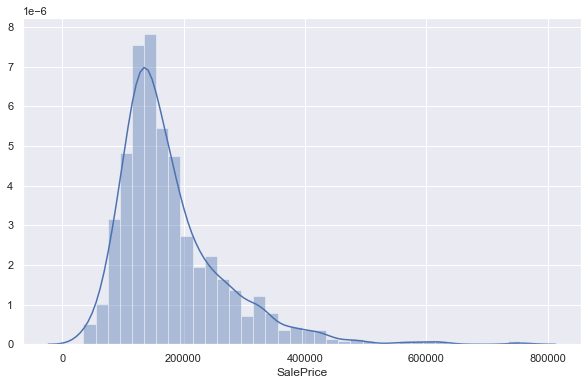

In [83]:
sns.distplot(yes_remod.SalePrice)

In [38]:
len(house[house.renovated != 0]) / len(house)

0.4767123287671233

(array([1049.,   72.,  117.,   67.,   49.,   34.,   38.,   21.,    8.,
           5.]),
 array([  0. ,  12.3,  24.6,  36.9,  49.2,  61.5,  73.8,  86.1,  98.4,
        110.7, 123. ]),
 <a list of 10 Patch objects>)

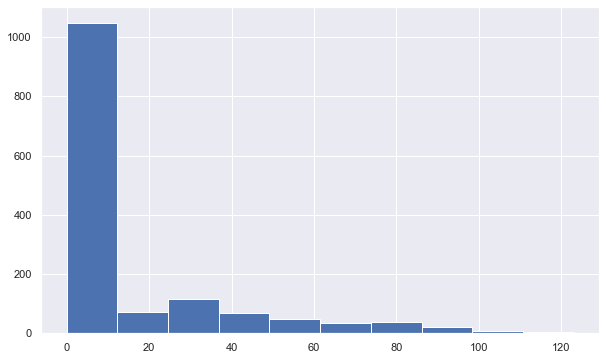

In [87]:
plt.hist(house.renovated)

In [91]:
house[(house.renovated >10)].describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   421.000000  421.000000   360.000000     421.000000   421.000000   
mean    732.206651   52.375297    66.913889   10549.021378     5.420428   
std     422.665316   38.730593    22.862696   10422.383530     1.140785   
min       4.000000   20.000000    21.000000    1526.000000     1.000000   
25%     381.000000   20.000000    55.000000    7000.000000     5.000000   
50%     707.000000   50.000000    60.000000    8973.000000     5.000000   
75%    1114.000000   70.000000    75.000000   11040.000000     6.000000   
max    1459.000000  190.000000   313.000000  159000.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd  MasVnrArea   BsmtFinSF1  ...  \
count   421.000000   421.000000    421.000000  420.000000   421.000000  ...   
mean      6.456057  1937.465558   1983.230404   33.733333   317.391924  ...   
std       1.414581    23.754235     22.694485   98.936615   352.781284  ...   
min       1.000000  1872.000000   1950.000000    0.000000     0.000000  ...   
25%       6.000000  1920.000000   1950.000000    0.000000     0.000000  ...   
50%       7.000000  1935.000000   1994.000000    0.000000   234.000000  ...   
75%       7.000000  1958.000000   2002.000000    0.000000   544.000000  ...   
max       9.000000  1995.000000   2010.000000  650.000000  1441.000000  ...   

       EnclosedPorch   3SsnPorch  ScreenPorch    PoolArea       MiscVal  \
count     421.000000  421.000000   421.000000  421.000000    421.000000   
mean       49.636580    3.904988    19.049881    2.755344     87.197150   
std        82.829938   27.536478    61.897841   40.203405    804.740261   
min         0.000000    0.000000     0.000000    0.000000      0.000000   
25%         0.000000    0.000000     0.000000    0.000000      0.000000   
50%         0.000000    0.000000     0.000000    0.000000      0.000000   
75%       100.000000    0.000000     0.000000    0.000000      0.000000   
max       552.000000  290.000000   480.000000  648.000000  15500.000000   

           MoSold       YrSold      SalePrice   renovated         age  
count  421.000000   421.000000     421.000000  421.000000  421.000000  
mean     6.251781  2007.874109  147714.323040   45.764846   24.643705  
std      2.569654     1.304140   57638.625605   24.842155   22.526099  
min      1.000000  2006.000000   34900.000000   11.000000    0.000000  
25%      5.000000  2007.000000  114500.000000   27.000000    6.000000  
50%      6.000000  2008.000000  136500.000000   39.000000   14.000000  
75%      8.000000  2009.000000  165500.000000   62.000000   56.000000  
max     12.000000  2010.000000  475000.000000  123.000000   60.000000  

[8 rows x 40 columns]

In [267]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# very old house, never renovated or renovated long ago, low quality
# house[(house.renovated <10) & (house.OverallQual < 5)]
# house[(house.renovated <10) & (house.OverallQual > 5)].shape
# house[(house.OverallQual].shape

house[(house.OverallQual < 6)].describe().T

house[(house.OverallQual < 6)].head()

low_qual_house = house[(house.OverallQual < 6)]
high_qual_house = house[(house.OverallQual >= 6)]

low_qual_house.sort_values('SalePrice')
# plt.scatter(low_qual_house.Neighborhood,low_qual_house.SalePrice)
# plt.xticks(rotation=90)

low_qual_house.SalePrice.describe().T


count       538.000000
mean     125633.180297
std       30999.379269
min       34900.000000
25%      108000.000000
50%      127750.000000
75%      143000.000000
max      256000.000000
Name: SalePrice, dtype: float64

In [268]:
low_qual_house.shape
len(low_qual_house)/len(house)

0.3684931506849315

<Figure size 1296x12960 with 0 Axes>

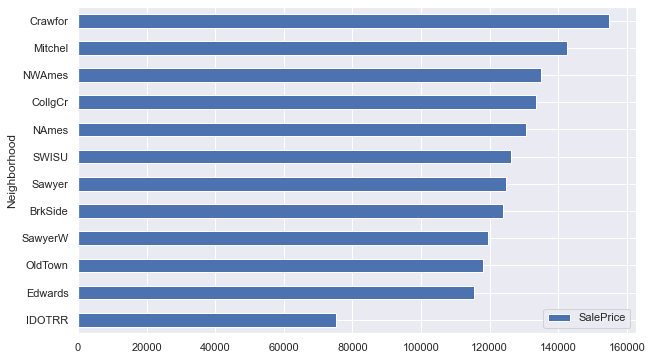

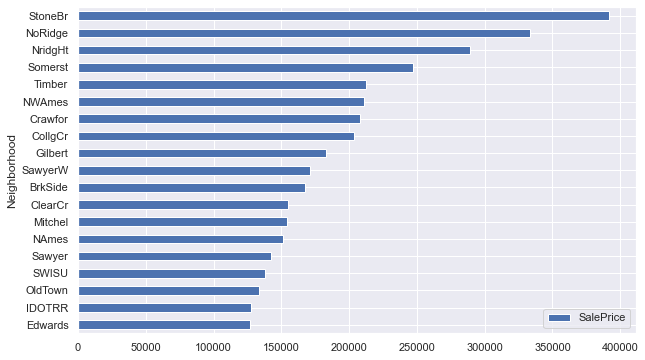

In [275]:
fig = plt.figure(figsize=(18, 180))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.975)
fig.suptitle('nominal features')

high_qual_house = high_qual_house[(high_qual_house.LotArea < 9500) & (high_qual_house.LotArea > 7500)].sort_values('SalePrice')

low_qual_house = low_qual_house[(low_qual_house.LotArea < 9500) & (low_qual_house.LotArea > 7500)].sort_values('SalePrice')


# low_qual_house.head(10)

# temp = house[(house.LotArea < 9500) & (house.LotArea > 7500)]

# low_qual_house.groupby('Neighborhood').sum()

# sns.lmplot(data=low_qual_house,x='LotArea', y='SalePrice',hue='Neighborhood')

low_qual_house.groupby('Neighborhood').agg({'SalePrice':'mean'}).sort_values(by='SalePrice').plot.barh()
high_qual_house.groupby('Neighborhood').agg({'SalePrice':'mean'}).sort_values(by='SalePrice').plot.barh()

# for i, col in enumerate(list(house[nominal_cols]),1):
#     # print(col)
#     ax = fig.add_subplot(len(nominal_cols), 2, i)
#     plt.hist(high_qual_house[col],alpha=0.8)
#     plt.hist(low_qual_house[col],alpha=0.8)
#     plt.xlabel('{}'.format(col), size=15,labelpad=12.5)
#     plt.ylabel('Frequecy', size=15, labelpad=12.5)
#     plt.xticks(rotation=45)
# plt.show()

In [276]:
high_qual_house.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000   -0.128900     0.051635  0.088497    -0.004380   
MSSubClass    -0.128900    1.000000    -0.129460 -0.184764     0.020489   
LotFrontage    0.051635   -0.129460     1.000000  0.262181     0.060764   
LotArea        0.088497   -0.184764     0.262181  1.000000     0.153007   
OverallQual   -0.004380    0.020489     0.060764  0.153007     1.000000   
OverallCond    0.074888    0.033361    -0.043609  0.039081    -0.219000   
YearBuilt     -0.049228   -0.051173     0.038041  0.025959     0.456617   
YearRemodAdd  -0.045481   -0.057563    -0.001032 -0.010348     0.494921   
MasVnrArea    -0.092795    0.125614     0.011485  0.139235     0.351132   
BsmtFinSF1    -0.089052   -0.086280     0.033186  0.125568     0.141200   
BsmtFinSF2     0.124061    0.137435     0.070178 -0.037636    -0.179750   
BsmtUnfSF      0.063427   -0.181369     0.132757  0.045174     0.226243   
TotalBsmtSF    0.025124   -0.287210     0.236343  0.189161     0.393665   
1stFlrSF       0.056600   -0.277682     0.223241  0.172283     0.342036   
2ndFlrSF      -0.047175    0.353467    -0.238902  0.045781     0.126277   
LowQualFinSF        NaN         NaN          NaN       NaN          NaN   
GrLivArea     -0.009958    0.198398    -0.104025  0.201784     0.443972   
BsmtFullBath  -0.068041   -0.054926     0.013110 -0.000719     0.079549   
BsmtHalfBath   0.063643    0.077393    -0.047791  0.147292    -0.099305   
FullBath      -0.030714    0.077898    -0.101269  0.095454     0.430020   
HalfBath      -0.028190    0.233531    -0.182929 -0.022100     0.091487   
BedroomAbvGr   0.047029   -0.018783    -0.053473  0.178397    -0.066114   
KitchenAbvGr   0.031588    0.217945     0.105180  0.052478    -0.060550   
TotRmsAbvGrd   0.005168    0.144943    -0.076781  0.132032     0.306650   
Fireplaces    -0.019042    0.083504    -0.184243 -0.148978     0.069980   
GarageYrBlt   -0.050474   -0.110331     0.071780 -0.058834     0.147960   
GarageCars     0.027018   -0.099102     0.087031  0.046617     0.450929   
GarageArea     0.005882   -0.071872     0.136733  0.171534     0.486145   
WoodDeckSF    -0.171291   -0.035303    -0.034307  0.100067     0.147271   
OpenPorchSF   -0.105031   -0.030551     0.019285  0.113159     0.310345   
EnclosedPorch  0.095435    0.047483     0.080652 -0.009071    -0.142141   
3SsnPorch     -0.048762   -0.013704    -0.155016  0.072227     0.020063   
ScreenPorch    0.025328   -0.008821    -0.046383  0.066100     0.014022   
PoolArea            NaN         NaN          NaN       NaN          NaN   
MiscVal        0.132763   -0.015893     0.019290  0.083532    -0.020514   
MoSold         0.016067   -0.093302     0.104772  0.089193     0.190702   
YrSold        -0.048052    0.069466     0.012349  0.061001     0.040768   
SalePrice     -0.022018    0.001449     0.080710  0.168786     0.775971   
renovated      0.028097    0.016538    -0.066274 -0.057104    -0.170627   
age            0.042095    0.062288     0.001885  0.014553    -0.491419   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.074888  -0.049228     -0.045481   -0.092795   -0.089052   
MSSubClass        0.033361  -0.051173     -0.057563    0.125614   -0.086280   
LotFrontage      -0.043609   0.038041     -0.001032    0.011485    0.033186   
LotArea           0.039081   0.025959     -0.010348    0.139235    0.125568   
OverallQual      -0.219000   0.456617      0.494921    0.351132    0.141200   
OverallCond       1.000000  -0.508874     -0.203299   -0.058937    0.038956   
YearBuilt        -0.508874   1.000000      0.816501    0.104611    0.098568   
YearRemodAdd     -0.203299   0.816501      1.000000    0.023416    0.058124   
MasVnrArea       -0.058937   0.104611      0.023416    1.000000    0.290528   
BsmtFinSF1        0.038956   0.098568      0.058124    0.290528    1.000000   
BsmtFinSF2        0.085686  -0.175579     -0.185207   -0.056020   -0.038571 

(array([ 0.,  0.,  0.,  0.,  0., 65.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

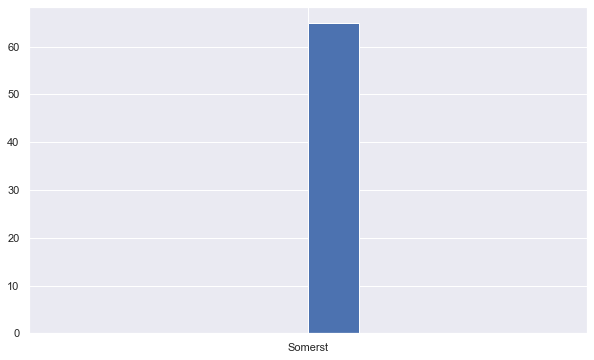

In [232]:
# high_qual_house[high_qual_house.MSZoning=='FV'].describe().T

# FV_house_only = high_qual_house[high_qual_house.MSZoning=='FV']
plt.hist(FV_house_only.Neighborhood)

In [196]:
low_nb = low_qual_house.Neighborhood
high_nb = high_qual_house.Neighborhood
diff_nb= set(high_nb) - set(low_nb)
print(diff_nb)

{'NridgHt', 'NPkVill', 'Somerst', 'StoneBr', 'Blmngtn', 'Blueste', 'NoRidge'}


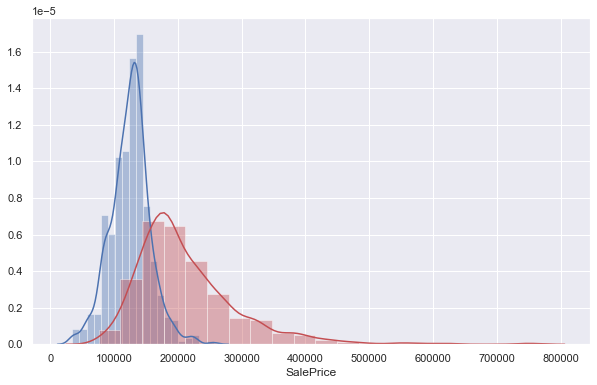

In [161]:
# COMPARE SALE PRICE

sns.distplot(low_qual_house.SalePrice, bins=20, hist=True, label='Low Quality')
sns.distplot(high_qual_house.SalePrice, bins=20, hist=True, label='High Quality', color='r')

In [131]:
high_qual_house.SalePrice.describe().T


count       548.000000
mean     248384.598540
std       84738.664786
min       82500.000000
25%      190000.000000
50%      230000.000000
75%      283057.250000
max      755000.000000
Name: SalePrice, dtype: float64

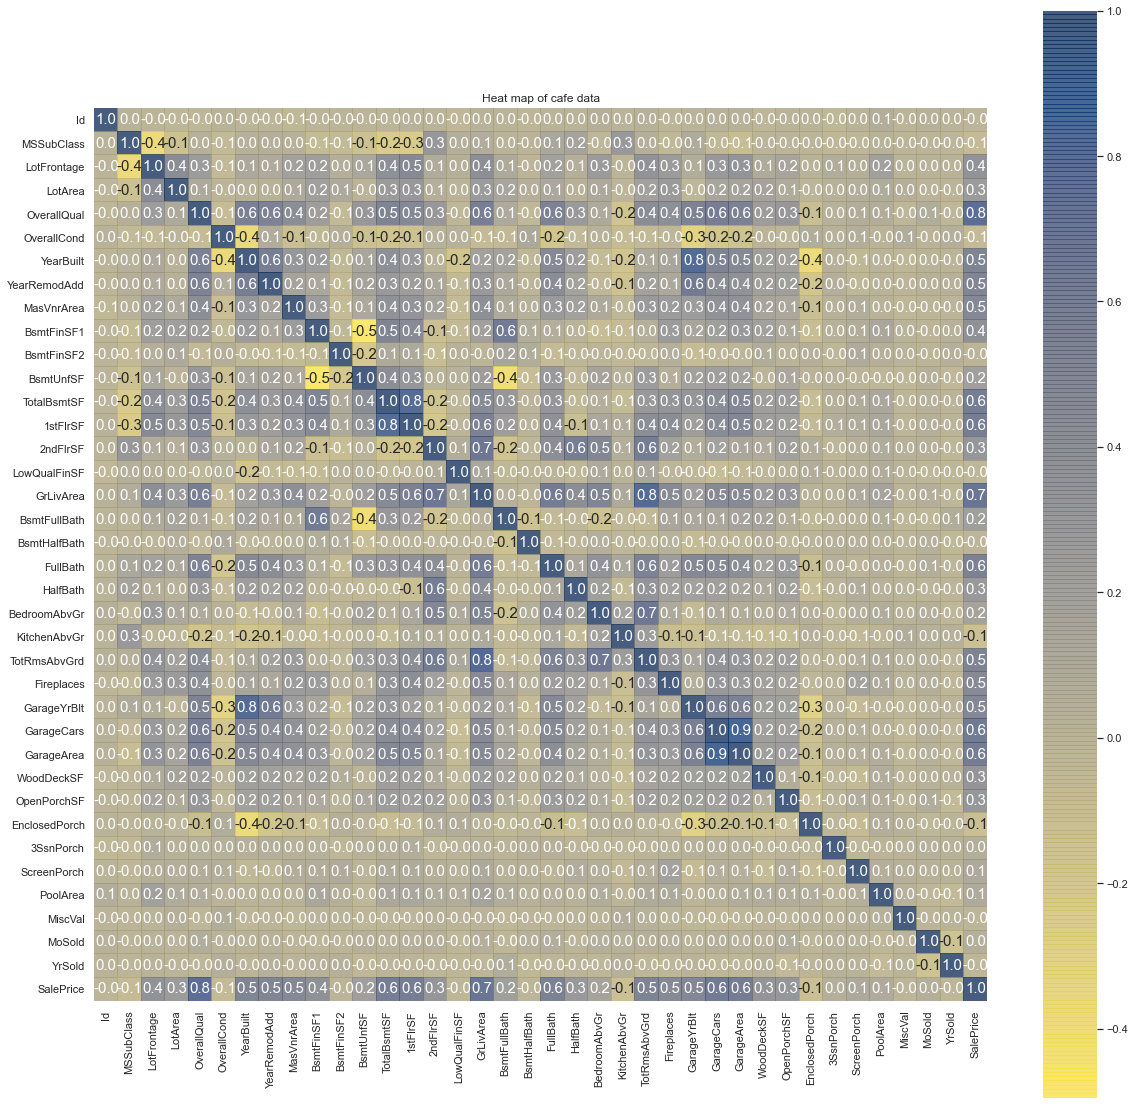

In [537]:
# Generate heat map of all the numeric attributes to check their relationships
corr = house.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='cividis_r',alpha=0.7)
plt.title('Heat map of cafe data')
plt.show()

In [260]:
def select_forward_feature(X,X_test,X_train,y_train):
    show_steps = False
    # start with no predictors
    included = []
    # keep track of model and parameters
    best = {'feature': '', 'r2': 0, 'a_r2': 0}
    # create a model object to hold the modelling parameters
    model = LinearRegression() # create a model for Linear Regression
    # get the number of cases in the test data
    n = X_test.shape[0]
    r2_list = []
    adjusted_r2_list = []

    while True:
        changed = False

        if show_steps:
            print('') 

        # list the features to be evaluated
        excluded = list(set(X.columns) - set(included))

        if show_steps:
            print('(Step) Excluded = %s' % ', '.join(excluded))  

        # for each remaining feature to be evaluated
        for new_column in excluded:

            if show_steps:
                print('(Step) Trying %s...' % new_column)
                print('(Step) - Features = %s' % ', '.join(included + [new_column]))

            # fit the model with the Training data
            # fit a model; consider which predictors should be included
            fit = model.fit(X_train[included + [new_column]],y_train) 

            # calculate the score (R^2 for Regression)
            r2 = model.score(X_train[included + [new_column]],y_train) # calculate the score

            # number of predictors in this model
            k = len(included + [new_column])

            # calculate the adjusted R^2
            adjusted_r2 = 1 - ((1-r2)*(n-1) / (n-k-1)) # calculate the Adjusted R^2

            if show_steps:
                print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                      (adjusted_r2, best['a_r2']))

            # if model improves
            if adjusted_r2 > best['a_r2']:
                # record new parameters
                best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
                # flag that found a better model
                changed = True
                if show_steps:
                    print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                          (best['feature'], best['r2'], best['a_r2']))
        # END for

        # if found a better model after testing all remaining features
        if changed:
            # update control details
            included.append(best['feature'])
            excluded = list(set(excluded) - set(best['feature']))
            print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
                  (best['feature'], best['r2'], best['a_r2']))

            r2_list.append(best['r2'])
            adjusted_r2_list.append(best['a_r2'])

        else:
            # terminate if no better model
            break

    print('')
    print('Resulting features:')
    print(', '.join(included))
    print('Coef: ' + str(model.coef_))

In [261]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)
    plt.xticks(rotation=90)
    plt.show()
    
#     plt.figure(figsize=(15,10))
#     plt.barh(model_coefs.variable, model_coefs.coef)

In [263]:
# HOT ENCODE nominal cols
house = pd.get_dummies(data = house, columns = nominal_cols)
house.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
4   5          60         84.0    14260            8            5       2000   
5   6          50         85.0    14115            5            5       1993   

   YearRemodAdd  MasVnrArea ExterQual ExterCond BsmtQual BsmtCond  \
0          2003       196.0        Gd        TA       Gd       TA   
1          1976         0.0        TA        TA       Gd       TA   
2          2002       162.0        Gd        TA       Gd       TA   
4          2000       350.0        Gd        TA       Gd       TA   
5          1995         0.0        TA        TA       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
4           Av          GLQ         655          Unf           0        490   
5           No          GLQ         732          Unf           0         64   

   TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          856        Ex       856       854             0       1710   
1         1262        Ex      1262         0             0       1262   
2          920        Ex       920       866             0       1786   
4         1145        Ex      1145      1053             0       2198   
5          796        Ex       796       566             0       1362   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
4             1             0         2         1             4             1   
5             1             0         1         1             1             1   

  KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu  GarageYrBlt  GarageCars  \
0          Gd             8           0          NA       2003.0           2   
1          TA             6           1          TA       1976.0           2   
2          Gd             6           1          TA       2001.0           2   
4          Gd             9           1          TA       2000.0           3   
5          TA             5           0          NA       1993.0           2   

   GarageArea GarageQual GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         548         TA         TA           0           61              0   
1         460         TA         TA         298            0              0   
2         608         TA         TA           0           42              0   
4         836         TA         TA         192           84              0   
5         480         TA         TA          40           30              0   

   3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence  MiscVal  MoSold  YrSold  \
0          0            0         0     NA     NA        0       2    2008   
1          0            0         0     NA     NA        0       5    2007   
2          0            0         0     NA     NA        0       9    2008   
4          0            0         0     NA     NA        0      12    2008   
5        320            0         0     NA  MnPrv      700      10    2009   

   SalePrice  CentralAir_N  CentralAir_Y  Street_Grvl  Street_Pave  \
0     208500             0             1            0            1   
1     181500             0             1            0            1   
2     223500             0             1            0            1   
4

In [ ]:
# calculate yearsold - yearremodadd

# predict overall quality



In [270]:
# ENCODE CATEGORICAL ORDINAL COLS

def factorize_ordinal_cols(data,cols,cat_list):
    for i in cols: 
        new_col = i + '_rating'
        cat = pd.Categorical(data[i], 
                         categories=cat_list, 
                         ordered=True)
        labels, unique = pd.factorize(cat, sort=True)
        data[new_col] = labels
        

cat1_cols = ['BsmtFinType1','BsmtFinType2']
cat2_cols = ['Fence']
cat3_cols = ['BsmtExposure']
cat4_cols = set(ordinal_cols) - set(cat1_cols) - set(cat2_cols) - set(cat3_cols)

cat1_list = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']       
cat2_list = ['NA','MnWw','GdWo','MnPrv','GdPrv']       
cat3_list = ['NA','No','Mn','Av','Gd']
cat4_list = ['NA','Po','Fa','TA','Gd','Ex']

factorize_ordinal_cols(house,cat1_cols,cat1_list)
factorize_ordinal_cols(house,cat2_cols,cat2_list)
factorize_ordinal_cols(house,cat3_cols,cat3_list)
factorize_ordinal_cols(house,cat4_cols,cat4_list)

# print(labels, unique)

['BsmtExposure']


In [114]:
house.tail(10)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1450  1451          90         60.0     9000            5            5   
1451  1452          20         78.0     9262            8            5   
1452  1453         180         35.0     3675            5            5   
1453  1454          20         90.0    17217            5            5   
1454  1455          20         62.0     7500            7            5   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea ExterQual ExterCond BsmtQual  \
1450       1974          1974         0.0        TA        TA       Gd   
1451       2008          2009       194.0        Gd        TA       Gd   
1452       2005          2005        80.0        TA        TA       Gd   
1453       2006          2006         0.0        TA        TA       Gd   
1454       2004          2005         0.0        Gd        TA       Gd   
1455       1999          2000         0.0        TA        TA       Gd   
1456       1978          1988       119.0        TA        TA       Gd   
1457       1941          2006         0.0        Ex        Gd       TA   
1458       1950          1996         0.0        TA        TA       TA   
1459       1965          1965         0.0        Gd        TA       TA   

     BsmtCond BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1450       TA          Unf           0          Unf           0        896   
1451       TA          Unf           0          Unf           0       1573   
1452       TA          GLQ         547          Unf           0          0   
1453       TA          Unf           0          Unf           0       1140   
1454       TA          GLQ         410          Unf           0        811   
1455       TA          Unf           0          Unf           0        953   
1456       TA          ALQ         790          Rec         163        589   
1457       Gd          GLQ         275          Unf           0        877   
1458       TA          GLQ          49          Rec        1029          0   
1459       TA          BLQ         830          LwQ         290        136   

      TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
1450          896        TA       896       896             0       1792   
1451         1573        Ex      1578         0             0       1578   
1452          547        Gd      1072         0             0       1072   
1453         1140        Ex      1140         0             0       1140   
1454         1221        Ex      1221         0             0       1221   
1455          953        Ex       953       694             0       1647   
1456         1542        TA      2073         0             0       2073   
1457         1152        Ex      1188      1152             0       2340   
1458         1078        Gd      1078         0             0       1078   
1459         1256        Gd      1256         0             0       1256   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1450             0             0         2         2             4   
1451             0             0         2         0             3   
1452             1             0         1         0             2   
1453             0             0         1         0             3   
1454             1             0         2         0             2   
1455             0             0         2         1             3   
1456             1             0         2         0             3   
1457             0             0         2         0             4   
1458             1             0         1         0

In [210]:
house.shape

(1188, 249)

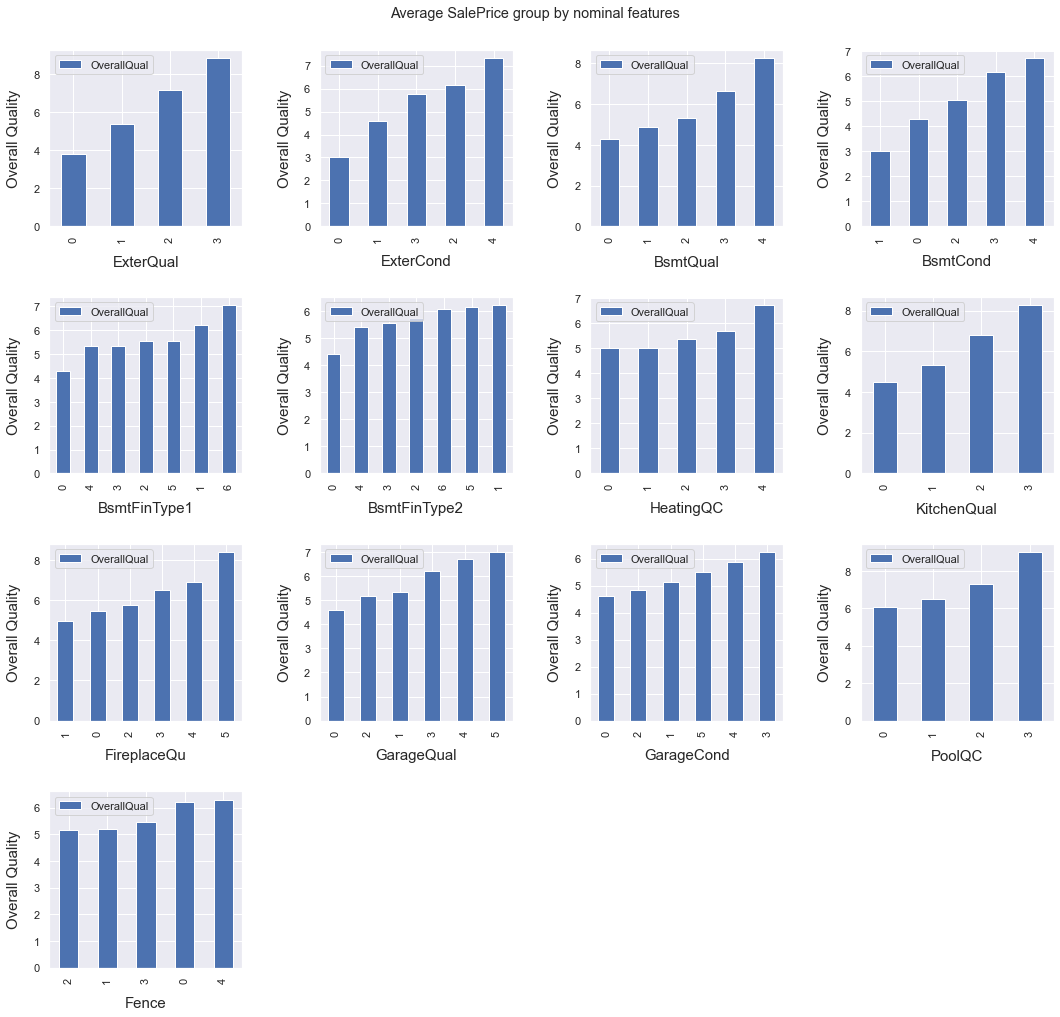

In [116]:
# plot average OveralQual of all ordinal columns

fig = plt.figure(figsize=(18, 120))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.975)
fig.suptitle('Average SalePrice group by nominal features')

for i, col in enumerate(list(house[ordinal_cols]),1):
    new_col = col + '_rating'
    ax = fig.add_subplot(len(nominal_cols), 4, i)
    house.groupby(new_col).agg({'OverallQual':'mean'}).sort_values(by='OverallQual').plot.bar(ax=ax)
    
    plt.xlabel('{}'.format(col), size=15,labelpad=12.5)
    plt.ylabel('Overall Quality', size=15, labelpad=12.5)
    
plt.show()


(array([149.,   0., 246.,   0.,   0.,  31.,   0., 111.,   0.,   1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

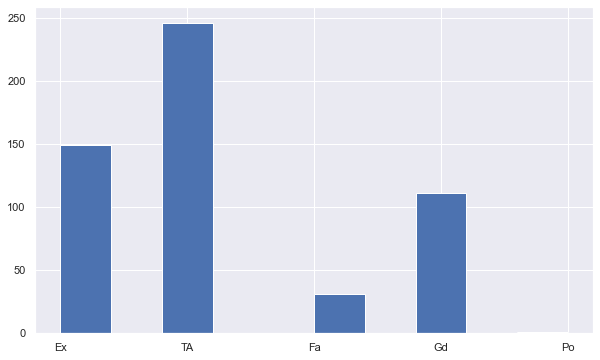

In [214]:
house[house.CentralAir=='N'].YearBuilt.describe()

no_aircon_house = house[house.CentralAir=='N']
# plt.hist(no_aircon_house.Neighborhood)
no_aircon_house.head()

low_qual_house.head()
# plt.hist(low_qual_house.CentralAir)
plt.hist(low_qual_house.HeatingQC)

In [236]:
# COMPARE HOUSE BY QUAL AND LOTAREA
low_qual_house[(low_qual_house.LotArea < 9500) * low_qual_house.LotArea > 7500 ].describe().T
high_qual_house[(high_qual_house.LotArea < 9500) * high_qual_house.LotArea > 7500 ].describe().T

count           mean           std      min        25%  \
Id             202.0     713.277228    410.141430      1.0     339.50   
MSSubClass     202.0      52.425743     28.412507     20.0      20.00   
LotFrontage    202.0      58.589109     26.494991      0.0      59.00   
LotArea        202.0    8639.311881    534.500266   7540.0    8133.25   
OverallQual    202.0       6.678218      0.792013      6.0       6.00   
OverallCond    202.0       5.450495      0.967134      3.0       5.00   
YearBuilt      202.0    1984.896040     26.430310   1910.0    1969.00   
YearRemodAdd   202.0    1990.955446     19.052245   1950.0    1978.25   
MasVnrArea     202.0      94.247525    151.133226      0.0       0.00   
BsmtFinSF1     202.0     351.267327    376.959303      0.0       0.00   
BsmtFinSF2     202.0      25.529703    116.636151      0.0       0.00   
BsmtUnfSF      202.0     671.103960    431.905133      0.0     292.00   
TotalBsmtSF    202.0    1047.900990    330.170618      0.0     804.50   
1stFlrSF       202.0    1106.653465    299.328101    616.0     861.00   
2ndFlrSF       202.0     445.084158    433.848321      0.0       0.00   
LowQualFinSF   202.0       0.000000      0.000000      0.0       0.00   
GrLivArea      202.0    1551.737624    353.999291    720.0    1348.25   
BsmtFullBath   202.0       0.371287      0.484349      0.0       0.00   
BsmtHalfBath   202.0       0.049505      0.239246      0.0       0.00   
FullBath       202.0       1.727723      0.457251      1.0       1.00   
HalfBath       202.0       0.529703      0.510203      0.0       0.00   
BedroomAbvGr   202.0       2.970297      0.563490      1.0       3.00   
KitchenAbvGr   202.0       1.009901      0.140720      0.0       1.00   
TotRmsAbvGrd   202.0       6.693069      1.148155      4.0       6.00   
Fireplaces     202.0       0.608911      0.590573      0.0       0.00   
GarageYrBlt    202.0    1957.836634    242.179014      0.0    1972.50   
GarageCars     202.0       1.881188      0.533218      0.0       2.00   
GarageArea     202.0     489.188119    164.129042      0.0     400.50   
WoodDeckSF     202.0      95.272277    111.269786      0.0       0.00   
OpenPorchSF    202.0      53.603960     54.655243      0.0       0.00   
EnclosedPorch  202.0      11.628713     45.568665      0.0       0.00   
3SsnPorch      202.0       3.435644     24.833341      0.0       0.00   
ScreenPorch    202.0      13.405941     50.796772      0.0       0.00   
PoolArea       202.0       0.000000      0.000000      0.0       0.00   
MiscVal        202.0      28.465347    214.276804      0.0       0.00   
MoSold         202.0       6.480198      2.609227      1.0       5.00   
YrSold         202.0    2007.900990      1.319618   2006.0    2007.00   
SalePrice      202.0  191364.034653  52666.035523  76000.0  158375.00   
renovated      202.0       6.059406     15.467393      0.0       0.00   
age            202.0      16.945545     19.078576      0.0       3.00   

                    50%        75%       max  
Id                724.5    1081.00    1458.0  
MSSubClass         60.0      60.00     190.0  
LotFrontage        65.5      73.00     129.0  
LotArea          8750.0    9096.00    9490.0  
OverallQual         7.0       7.00       9.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1998.0    2004.00    2009.0  
YearRemodAdd     2000.0    2005.00    2009.0  
MasVnrArea          0.0     145.25     768.0  
BsmtFinSF1        287.5     639.75    1540.0  
BsmtFinSF2          0.0       0.00     841.0  
BsmtUnfSF         647.5     922.50    1869.0  
TotalBsmtSF       978.5    1302.00    1869.0  
1stFlrSF         1043.0    1339.75    1869.0  
2ndFlrSF          593.5     806.25    1540.0  
LowQualFinSF        0.0       0.00       0.0  
GrLivArea        1509.0    1727.50    2715.0  
BsmtFullBath        0.0       1.00       1.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            1.0       1.00

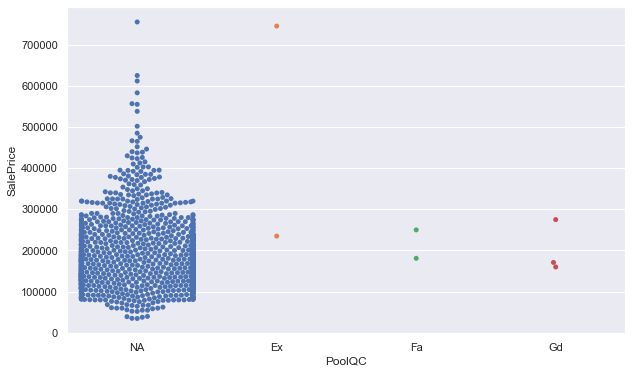

In [54]:
sns.swarmplot(house.PoolQC, house.SalePrice)



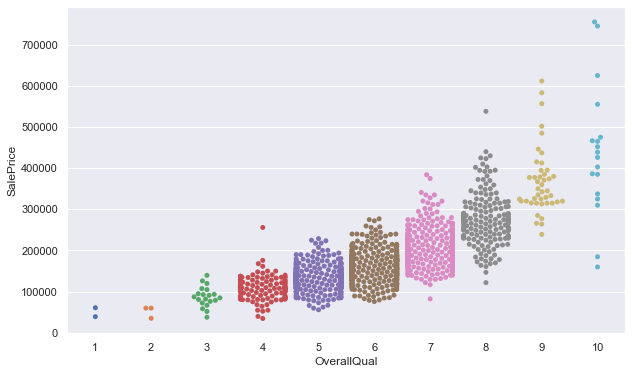

In [55]:
sns.swarmplot(house.OverallQual, house.SalePrice)

In [16]:
pd.set_option('display.max_columns', None)
house[house.columns[1:]].corr()['SalePrice'][:-1]

MSSubClass           -0.084284
LotFrontage           0.209624
LotArea               0.263843
OverallQual           0.790982
OverallCond          -0.077856
                        ...   
HeatingQC_rating      0.427649
GarageCond_rating     0.263191
BsmtQual_rating       0.622925
PoolQC_rating         0.119680
KitchenQual_rating    0.659600
Name: SalePrice, Length: 247, dtype: float64

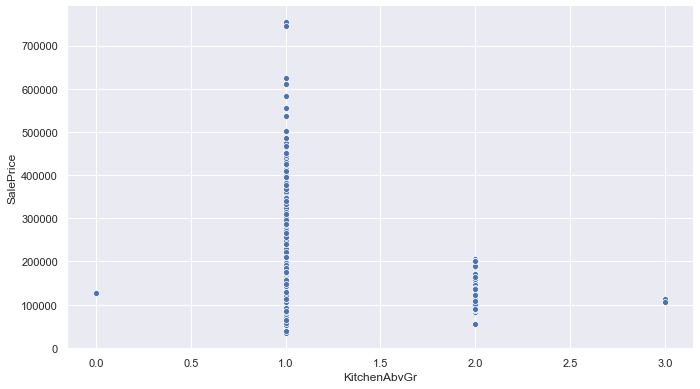

In [19]:

sns.pairplot(data=house,x_vars='KitchenAbvGr',y_vars='SalePrice')
plt.gcf().set_size_inches(12, 6)

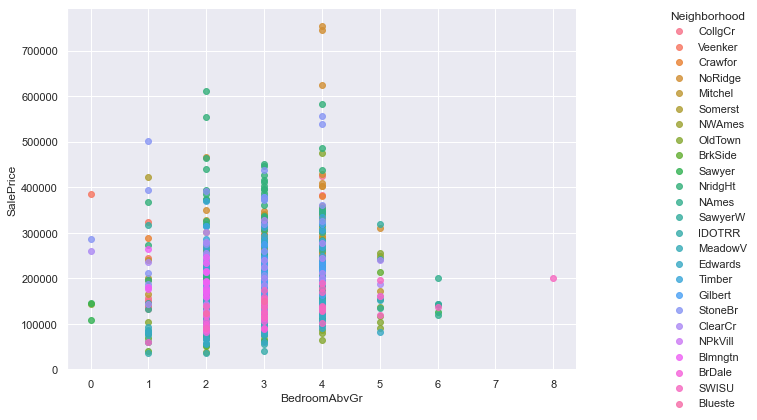

In [12]:
sns.lmplot(x='BedroomAbvGr', y='SalePrice', data=house, hue='Neighborhood', fit_reg=False)
plt.gcf().set_size_inches(12, 6);

In [271]:
rating_cols = [col for col in house if col.endswith('_rating')]
print(rating_cols)

['BsmtFinType1_rating', 'BsmtFinType2_rating', 'Fence_rating', 'BsmtExposure_rating', 'FireplaceQu_rating', 'GarageQual_rating', 'ExterQual_rating', 'ExterCond_rating', 'HeatingQC_rating', 'GarageCond_rating', 'BsmtQual_rating', 'PoolQC_rating', 'KitchenQual_rating', 'BsmtCond_rating']


In [274]:
# define the target variable (dependent variable) as y
y = house['OverallQual']

# cols1 =['LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF']
        
cols2 = rating_cols

cols3 =['ExterQual_rating', 'BsmtQual_rating', 'FireplaceQu_rating', 'KitchenQual_rating', 'GarageQual_rating', 'BsmtFinType1_rating']

cols4 = list(filter(lambda x: (x != 'OverallQual') & (x != 'SalePrice'), num_cols))

# cols = cols3 + cols4

cols = cols2

# best model to predict OverallQual
# cols = cols3
# ExterQual_rating, BsmtQual_rating, KitchenQual_rating

# Load the dataset as a pandas data frame
X = pd.DataFrame(house, columns = cols)

## Create training and testing subsets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Create a model for Linear Regression
lg2 = LinearRegression()

# Fit the model with the Training data
lg2.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
score_train = lg2.score(X_train,y_train)

# Calculate the score (R^2 for Regression) for Testing Data
score_test = lg2.score(X_test,y_test)

print('Score_train: ' + str(score_train))
print('Score_test: ' + str(score_test))

Score_train: 0.6424776442484226
Score_test: 0.6535491663192599


In [120]:
select_forward_feature(X,X_test,X_train,y_train)

Added feature ExterQual_rating with R^2 = 0.506 and adjusted R^2 = 0.504
Added feature GrLivArea with R^2 = 0.608 and adjusted R^2 = 0.605
Added feature BsmtQual_rating with R^2 = 0.670 and adjusted R^2 = 0.667
Added feature KitchenQual_rating with R^2 = 0.690 and adjusted R^2 = 0.686
Added feature FireplaceQu_rating with R^2 = 0.702 and adjusted R^2 = 0.697
Added feature YearBuilt with R^2 = 0.709 and adjusted R^2 = 0.703
Added feature BsmtUnfSF with R^2 = 0.713 and adjusted R^2 = 0.706
Added feature OverallCond with R^2 = 0.718 and adjusted R^2 = 0.710
Added feature MasVnrArea with R^2 = 0.721 and adjusted R^2 = 0.713
Added feature KitchenAbvGr with R^2 = 0.724 and adjusted R^2 = 0.714
Added feature GarageCars with R^2 = 0.727 and adjusted R^2 = 0.716
Added feature MSSubClass with R^2 = 0.729 and adjusted R^2 = 0.718
Added feature EnclosedPorch with R^2 = 0.732 and adjusted R^2 = 0.719
Added feature LotFrontage with R^2 = 0.733 and adjusted R^2 = 0.720
Added feature BedroomAbvGr with

In [88]:
coef_df = pd.DataFrame({'feature': X.columns, 'coef':lg2.coef_})
coef_df.sort_values('coef',ascending=False)

feature      coef
5      ExterQual_rating  0.700268
9       BsmtQual_rating  0.498949
11   KitchenQual_rating  0.444422
10        PoolQC_rating  0.307156
4     GarageQual_rating  0.242049
3    FireplaceQu_rating  0.152610
12      BsmtCond_rating  0.047211
7      HeatingQC_rating  0.032918
2          Fence_rating  0.008538
6      ExterCond_rating  0.003321
0   BsmtFinType1_rating -0.026622
1   BsmtFinType2_rating -0.053942
8     GarageCond_rating -0.132708

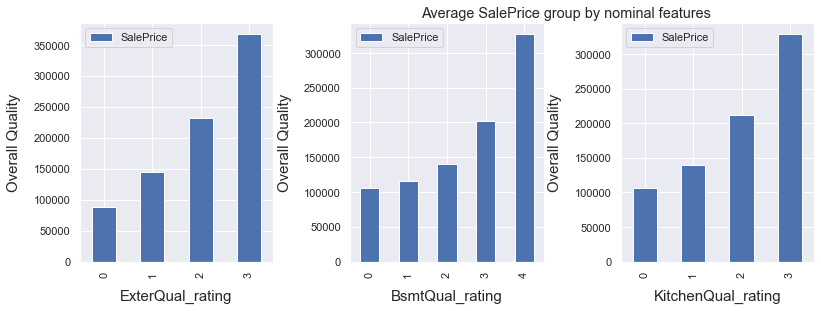

In [98]:
# plot average OveralQual of all ordinal columns

fig = plt.figure(figsize=(18, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.965)
fig.suptitle('Average SalePrice group by nominal features')

top3_ordinal_cols = ['ExterQual_rating', 'BsmtQual_rating', 'KitchenQual_rating']

for i, col in enumerate((top3_ordinal_cols),1):
    ax = fig.add_subplot(len(top3_ordinal_cols), 4, i)
    house.groupby(col).agg({'SalePrice':'mean'}).sort_values(by='SalePrice').plot.bar(ax=ax)
    
    plt.xlabel('{}'.format(col), size=15,labelpad=12.5)
    plt.ylabel('Overall Quality', size=15, labelpad=12.5)
    
plt.show()

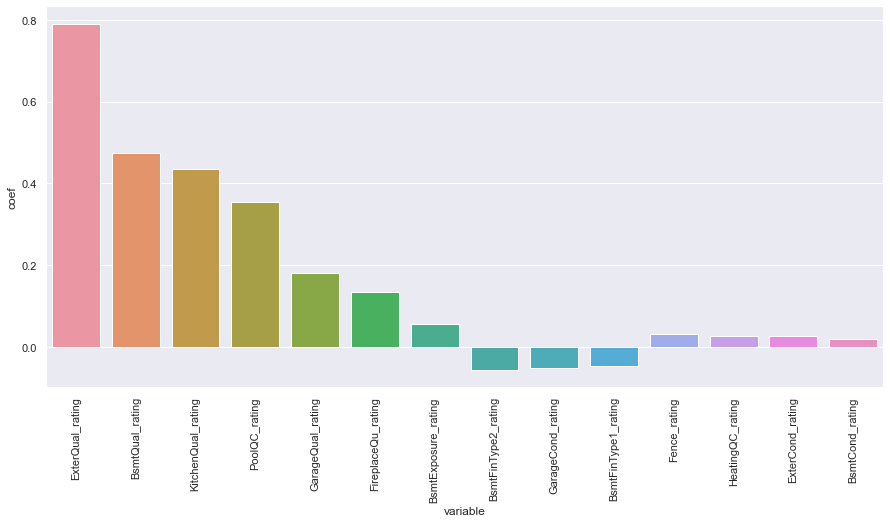

In [275]:
plt.figure(figsize=(15,7))
view_coeff(X,lg2)

In [312]:
Neighborhood_encoded_cols = [col for col in house if col.startswith('Neighborhood_')]
Foundation_encoded_cols = [col for col in house if col.startswith('Foundation_')]
BldgType_encoded_cols = [col for col in house if col.startswith('BldgType_')]
HouseStyle_encoded_cols = [col for col in house if col.startswith('HouseStyle_')]
GarageFinish_encoded_cols = [col for col in house if col.startswith('GarageFinish_')]
PavedDrive_encoded_cols = [col for col in house if col.startswith('PavedDrive_')]

encoded_cols = []
# temp = ['GarageFinish', 'Exterior2nd', 'Exterior1st', 'Foundation','MasVnrType']
temp = ['LotConfig', 'Neighborhood']
for i in temp:
    col_name = i + '_'
    temp = [col for col in house if col.startswith(col_name)]
    encoded_cols = encoded_cols + temp

print(encoded_cols)

['LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker']


In [313]:
# define the target variable (dependent variable) as y
y = house['SalePrice']

test_cols0 = ['OverallQual', 'GrLivArea', 'LotArea', 'YearBuilt', 'BedroomAbvGr', 'GarageArea', 'KitchenAbvGr','FullBath']

test_cols1 = ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageCars', 'YearRemodAdd', 'LotArea', 'YearBuilt','BedroomAbvGr', 'MasVnrArea']

test_cols2 = ['LotArea','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF']

test_cols2_without_outlier = ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'TotalBsmtSF', 'YearBuilt', 'LotArea', 'BedroomAbvGr', 'KitchenAbvGr', 'MasVnrArea', 'YearRemodAdd', 'GarageArea']

test_cols2_with_outlier = ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageArea', 'YearRemodAdd', 'LotArea', 'YearBuilt', 'Fireplaces', 'TotalBsmtSF', 'KitchenAbvGr', 'WoodDeckSF', 'GarageYrBlt', 'GarageCars']    

test_cols6 = ['ExterQual_rating', 'BsmtQual_rating', 'KitchenQual_rating']


#cols = test_cols2_without_outlier + Neighborhood_encoded_cols + BldgType_encoded_cols + GarageFinish_encoded_cols + PavedDrive_encoded_cols + test_cols6


numCols = list(filter(lambda x: (x != 'SalePrice'), num_cols))

#current best model
# cols = test_cols1 + test_cols6 + Neighborhood_encoded_cols + BldgType_encoded_cols 
    
cols = test_cols1 + test_cols6 + encoded_cols
#     OverallQual, GrLivArea, BsmtFinSF1, ExterQual_rating, LotArea, YearBuilt, BedroomAbvGr, BldgType_1Fam, MasVnrArea, KitchenQual_rating, GarageCars, BsmtQual_rating
print(cols)  

# Load the dataset as a pandas data frame
X = pd.DataFrame(house, columns = cols)


['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageCars', 'YearRemodAdd', 'LotArea', 'YearBuilt', 'BedroomAbvGr', 'MasVnrArea', 'ExterQual_rating', 'BsmtQual_rating', 'KitchenQual_rating', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker']


In [314]:
## LINEAR REGRESSION MODEL
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Create a model for Linear Regression
lg = LinearRegression()

# Fit the model with the Training data
lg.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
score_train = lg.score(X_train,y_train)

# Calculate the score (R^2 for Regression) for Testing Data
score_test = lg.score(X_test,y_test)

print('Score_train: ' + str(score_train))
print('Score_test: ' + str(score_test))

Score_train: 0.8901630836144828
Score_test: 0.8864330421513953


In [279]:
select_forward_feature(X,X_test,X_train,y_train)

Added feature OverallQual with R^2 = 0.633 and adjusted R^2 = 0.631
Added feature GrLivArea with R^2 = 0.746 and adjusted R^2 = 0.744
Added feature BsmtFinSF1 with R^2 = 0.805 and adjusted R^2 = 0.803
Added feature ExterQual_rating with R^2 = 0.825 and adjusted R^2 = 0.822
Added feature LotArea with R^2 = 0.847 and adjusted R^2 = 0.843
Added feature YearBuilt with R^2 = 0.855 and adjusted R^2 = 0.852
Added feature RoofMatl_WdShngl with R^2 = 0.863 and adjusted R^2 = 0.858
Added feature BedroomAbvGr with R^2 = 0.868 and adjusted R^2 = 0.863
Added feature KitchenQual_rating with R^2 = 0.872 and adjusted R^2 = 0.867
Added feature MasVnrArea with R^2 = 0.877 and adjusted R^2 = 0.871
Added feature GarageCars with R^2 = 0.878 and adjusted R^2 = 0.872
Added feature BsmtQual_rating with R^2 = 0.879 and adjusted R^2 = 0.873

Resulting features:
OverallQual, GrLivArea, BsmtFinSF1, ExterQual_rating, LotArea, YearBuilt, RoofMatl_WdShngl, BedroomAbvGr, KitchenQual_rating, MasVnrArea, GarageCars, Bs

In [320]:
coef_df = pd.DataFrame({'feature': X.columns, 'coef':lg.coef_})
coef_df.sort_values('coef',ascending=False).head(20)

feature          coef
32  Neighborhood_NoRidge  29035.829472
23  Neighborhood_Crawfor  21656.878100
33  Neighborhood_NridgHt  17877.506790
20  Neighborhood_BrkSide  14550.056481
0            OverallQual  13037.500755
11    KitchenQual_rating  10115.890774
13     LotConfig_CulDSac   9115.196121
9       ExterQual_rating   9011.571475
12      LotConfig_Corner   5943.488313
30  Neighborhood_NPkVill   5403.598607
16      LotConfig_Inside   5136.082737
3             GarageCars   4467.308325
41  Neighborhood_Veenker   4005.316470
10       BsmtQual_rating   3761.337020
38  Neighborhood_Somerst   2942.545811
39  Neighborhood_StoneBr   1986.406429
26   Neighborhood_IDOTRR   1686.388057
29    Neighborhood_NAmes    404.802898
6              YearBuilt    256.040369
4           YearRemodAdd    120.484550

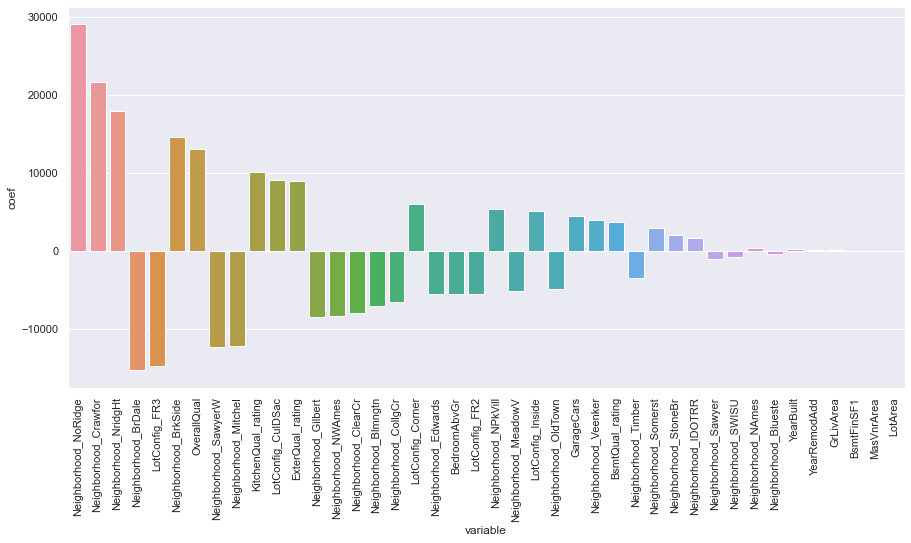

In [316]:
plt.figure(figsize=(15,7))
view_coeff(X,lg)

Score:  0.8767883520268714
Rmse:  24225.53007927729


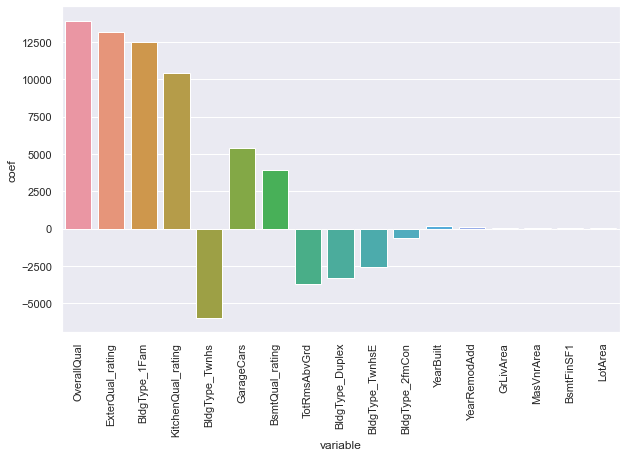

In [232]:
lm = LinearRegression()

lm.fit(X_train,y_train)

score = lm.score(X_train,y_train)

y_pred = lm.predict(X_test)

print('Score: ', score)

print('Rmse: ', np.sqrt(mean_squared_error(y_test, y_pred)))

view_coeff(X,lm)


In [144]:
# plt.scatter(X_train,y_train)
# plt.plot(X, y_pred)
X.shape
y.shape
# plt.figure(figsize=(15,7))
# plt.scatter(X,y)

# plt.plot(X,y_pred,color='r')
# plt.plot((X,X),(y,y_pred),'o-')
# plt.xlabel('sq__ft')
# plt.ylabel('price')

(1188,)

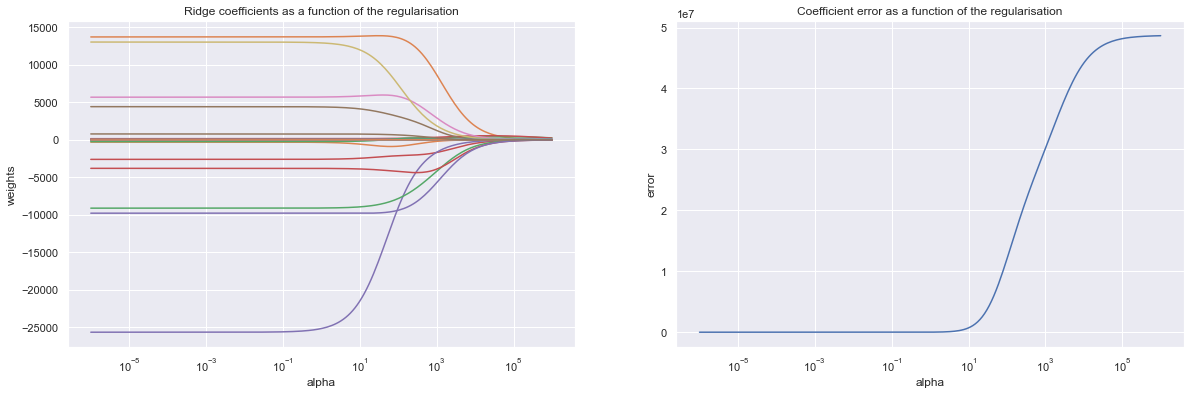

In [677]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# print(ridge_alphas)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, lm.coef_))


# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

Alpha: 30.01835813575586
Score: 0.8203628072650726


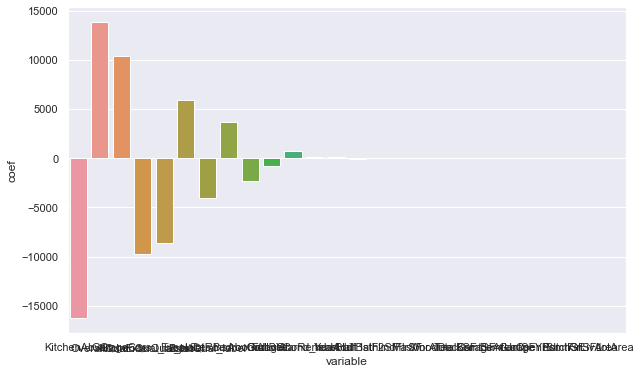

In [678]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

view_coeff(X, optimal_ridge)

In [29]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
lasm = Lasso()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6,6,200)

# Train the model with different regularisation strengths
for a in lasso_alphas:
    lasm.set_params(alpha=a)
    lasm.fit(X,y)
    coefs.append(lasm.coef_)
    errors.append(mean_squared_error(lasm.coef_,lm.coef_))
 

/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294347869816.10333, tolerance: 554918222.965172
  model = cd_fast.enet_coordinate_descent(
/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294347863931.94775, tolerance: 554918222.965172
  model = cd_fast.enet_coordinate_descent(
/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294347857171.3398, tolerance: 554918222.965172
  model = cd_fast.enet_coordinate_descent(
/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/sklearn

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id                  1.000000    0.021892    -0.018009  0.015061    -0.023529   
MSSubClass          0.021892    1.000000    -0.209518 -0.297903     0.062752   
LotFrontage        -0.018009   -0.209518     1.000000  0.199135     0.104495   
LotArea             0.015061   -0.297903     0.199135  1.000000     0.161183   
OverallQual        -0.023529    0.062752     0.104495  0.161183     1.000000   
...                      ...         ...          ...       ...          ...   
GarageCond_rating   0.006563   -0.069596    -0.000344  0.123964     0.282278   
BsmtQual_rating    -0.038937    0.099307     0.034150  0.061730     0.618288   
PoolQC_rating       0.044735    0.002844     0.030329  0.019371     0.008888   
KitchenQual_rating  0.014403    0.018857     0.069224  0.076692     0.650686   
BsmtCond_rating    -0.005447   -0.007880     0.006341  0.035205     0.270913   

                    OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
Id                    -0.011120  -0.025027     -0.027098   -0.041877   
MSSubClass            -0.075728   0.048555      0.052990    0.043933   
LotFrontage           -0.021216  -0.027626      0.014105    0.058574   
LotArea                0.011812   0.010864      0.015958    0.142630   
OverallQual           -0.064751   0.525114      0.509255    0.357500   
...                         ...        ...           ...         ...   
GarageCond_rating     -0.004666   0.284316      0.131049    0.128063   
BsmtQual_rating       -0.177942   0.625332      0.511243    0.244319   
PoolQC_rating          0.003670   0.012011     -0.002222   -0.006793   
KitchenQual_rating    -0.005797   0.503762      0.617327    0.224738   
BsmtCond_rating        0.163183   0.169283      0.193028    0.066966   

                    BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
Id                    0.000247   -0.015646  -0.012101    -0.018880  0.011467   
MSSubClass           -0.085957   -0.061155  -0.129324    -0.247707 -0.261051   
LotFrontage          -0.001239    0.012917   0.130681     0.141124  0.180616   
LotArea               0.195665    0.058350   0.059749     0.284496  0.390222   
OverallQual           0.190404   -0.037507   0.302237     0.494062  0.420121   
...                        ...         ...        ...          ...       ...   
GarageCond_rating     0.156998    0.036828   0.012640     0.187137  0.167749   
BsmtQual_rating       0.302858   -0.016923   0.213243     0.522885  0.255228   
PoolQC_rating         0.022352    0.046945  -0.024574     0.016141  0.014093   
KitchenQual_rating    0.197329   -0.022601   0.191016     0.390545  0.346317   
BsmtCond_rating       0.186779    0.092013   0.173030     0.408176  0.053642   

                    2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
Id                  0.029923     -0.026294   0.031707      0.008648   
MSSubClass          0.309229      0.020508   0.085464     -0.013879   
LotFrontage         0.025369      0.028450   0.153291     -0.009341   
LotArea             0.100373      0.022210   0.367118      0.094805   
OverallQual         0.323204     -0.020169   0.578363      0.092018   
...                      ...           ...        ...           ...   
GarageCond_rating   0.055880     -0.070718   0.161261      0.061522   
BsmtQual_rating     0.149437     -0.055302   0.306419      0.227260   
PoolQC_rating      -0.000622     -0.005647   0.008947      0.054421   
KitchenQual_rating  0.186049     -0.009513   0.407457      0.160278   
BsmtCond_rating     0.056644     -0.010362   0.086493      0.157259   

                    BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                     -0.017720  0.010463  0.027249      0.057216   
MSSubClass             -0.017527  0.141977  0.173198     -0.042654   
LotFrontage            -0.021428  0.080940 -0.027666      0.153681   
LotArea                 0.034345  0.175906  0.074941      0.281927   
OverallQual            -0.039709  0.

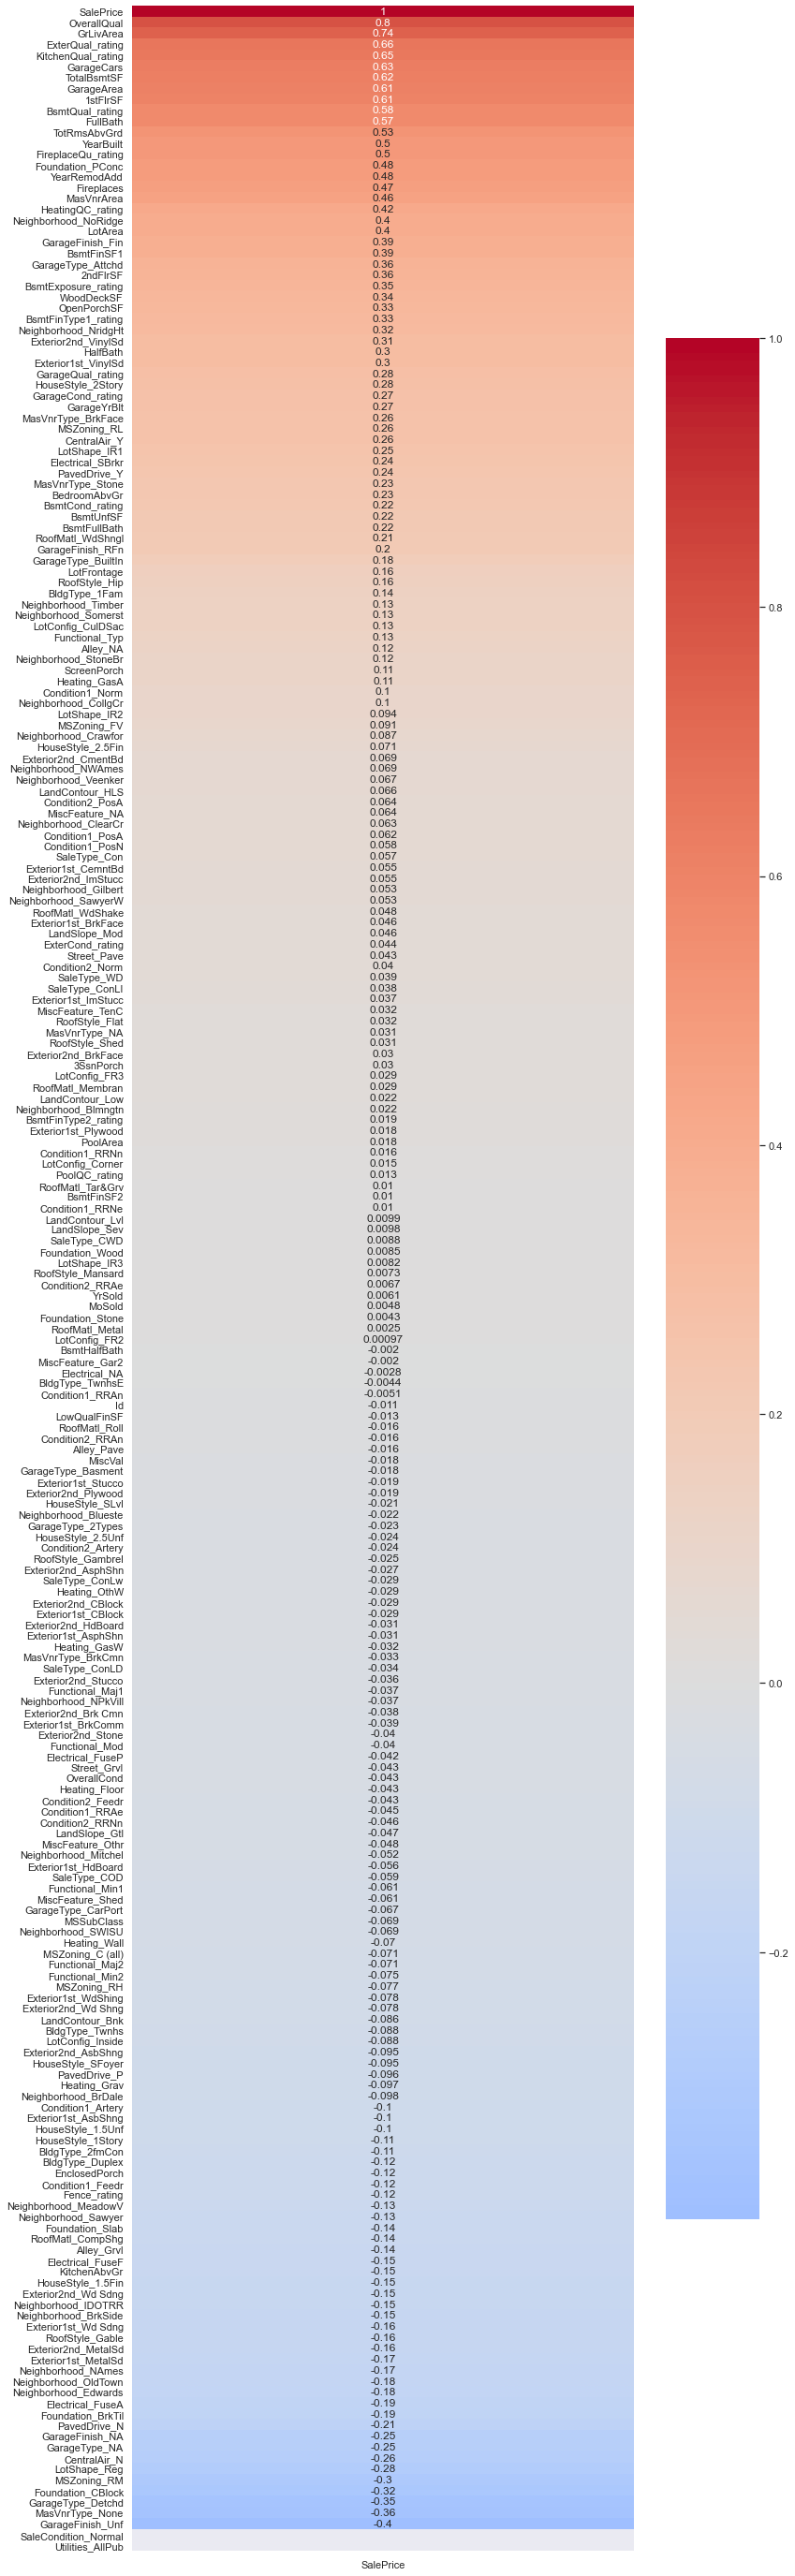

In [323]:
figure = plt.figure(figsize=(12,50))
sns.heatmap(house.corr()[['SalePrice']].sort_values('SalePrice',ascending=False),annot=True, cmap='coolwarm', center=0);
